**Departemen Sales: Shinta Nur Alfiana (DBA2028392)**

Kelompok: 80

House Camp: DBA-P



#**1. Business Understanding**
The Look adalah situs pakaian e-Commerce fiktif yang dikembangkan oleh tim Looker. Dataset berisi informasi tentang pelanggan, produk, pesanan, logistik, acara web, dan kampanye pemasaran digital. Isi dari kumpulan data ini adalah sintetis, dan diberikan kepada praktisi
industri untuk tujuan penemuan, pengujian, dan evaluasi produk.

---
**Department Sales** mempunyai tujuan untuk melihat produk atau barang yang berhasil terjual (status order= complete) melalui metode pengolahan data clustering sehingga dengan diketahui karakteristik barang yang berhasil terjual pihak The Look dapat meningkatkan pelayanan mulai dari ketersediaan barang dan waktu pelayanan agar penjualan pun meningkat.



#**2. Data Understanding**#


In [ ]:
# Import Library / Mengambil Codingan Dari Orang Lain

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pprint import pprint
from time import time

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import normalize

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


**Data Dictionary**

Pertama, kita perlu mengetahui representasi setiap kolom pada data sebelum melakukan eksplorasi lebih jauh.

| column | description |
| ------ | ----------- |
| `order_id` |  Id order|
| `user_id` | Id user |
| `age` | Usia user |
| `product_id` | Id produk |
| `category` | Kategori produk |
| `status` | Status order|
| `created_at` | Waktu order dibuat |
| `shipped_at` | Waktu order dikemas |
| `delivered_at` | Waktu order dikirim |
| `lama_pemesanan` | Waktu yang diperlukan dari order dibuat sampai dengan dikirim dalam satuan hari (delivered_at - created_at) |
| `num_of_item` | Jumlah item yang dipesan |
| `sale_price` | Harga jual produk |
| `cost` | Harga produk saat produksi |
| `profit_kotor` | Profit kotor produk dihitung (sale_price-cost) |
| `ratio_profit` | ratio profit kotor/harga jual |


In [ ]:
#untuk menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My final project/sales.csv') #Mengimport tabel
df#Menampilkan 5 baris teratas dari data


,id,order_id,user_id,gender,age,product_id,category,department,status,created_at,...,num_of_item,sale_price,cost,profit_kotor,ratio_profit,country,city,state,latitude,longitude
0,85756,59418,47846,F,45,13606,Accessories,Women,Cancelled,2022-05-18 11:38:00,...,2,2.50,1.10750,1.39250,0.557,Spain,Mataró,Cataluña,41.540629,2.448863
1,39482,27384,22099,M,41,28951,Accessories,Men,Shipped,2022-02-12 18:07:00,...,4,3.00,1.26900,1.73100,0.577,China,Chaozhou,Shanxi,38.002257,110.959810
2,101706,70412,56546,M,18,28679,Accessories,Men,Returned,2022-05-01 04:38:00,...,2,3.50,1.52250,1.97750,0.565,United States,Raleigh,North Carolina,35.813127,-78.717292
3,142183,98312,78861,F,61,15419,Plus,Women,Returned,2021-03-05 07:27:00,...,1,3.50,1.75000,1.75000,0.500,South Korea,Seoul,Seoul,37.523366,126.846259
4,48330,33447,27004,F,65,14248,Accessories,Women,Processing,2019-05-13 15:12:00,...,4,3.50,1.42450,2.07550,0.593,United States,San Diego,California,32.812568,-117.035207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180503,116498,80546,64601,F,13,10029,Sleep & Lounge,Women,Complete,2022-01-31 13:43:00,...,1,7.16,4.55376,2.60624,0.364,Spain,Huelva,Andalucía,37.294312,-6.960353
180504,170506,117752,94659,F,24,744,Tops & Tees,Women,Cancelled,2021-01-08 02:30:00,...,1,7.91,4.63526,3.27474,0.414,Brasil,Andradas,Minas Gerais,-22.076303,-46.555183
180505,42634,29517,23825,F,50,15592,Plus,Women,Shipped,2020-10-22 06:24:00,...,1,8.32,4.16000,4.16000,0.500,United Kingdom,Southport,England,53.620111,-3.008411
180506,23902,16508,13378,F,39,15592,Plus,Women,Returned,2021-07-07 10:33:00,...,1,8.32,4.16000,4.16000,0.500,South Korea,Hwaseong City,Gyeonggi-do,37.153729,126.882037


In [ ]:
df.shape #Melihat ukuran data yang sudah diimport

(180508, 24)

In [ ]:
df.columns #Melihat kolom yang ada pada dataset yang telah diimport

Index(['id', 'order_id', 'user_id', 'gender', 'age', 'product_id', 'category',
       'department', 'status', 'created_at', 'shipped_at', 'delivered_at',
       'returned_at', 'lama_pemesanan', 'num_of_item', 'sale_price', 'cost',
       'profit_kotor', 'ratio_profit', 'country', 'city', 'state', 'latitude',
       'longitude'],
      dtype='object')

**Insight** Data yang diimport memiliki 180508 baris dan 24 kolom

---



---



In [ ]:
df.info() #Melihat info dan ada tidaknya missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              180508 non-null  int64  
 1   order_id        180508 non-null  int64  
 2   user_id         180508 non-null  int64  
 3   gender          180508 non-null  object 
 4   age             180508 non-null  int64  
 5   product_id      180508 non-null  int64  
 6   category        180508 non-null  object 
 7   department      180508 non-null  object 
 8   status          180508 non-null  object 
 9   created_at      180508 non-null  object 
 10  shipped_at      117502 non-null  object 
 11  delivered_at    63035 non-null   object 
 12  returned_at     17752 non-null   object 
 13  lama_pemesanan  63035 non-null   float64
 14  num_of_item     180508 non-null  int64  
 15  sale_price      180508 non-null  float64
 16  cost            180508 non-null  float64
 17  profit_kot

**Insight**

Terdapat 45283 baris dan 21 kolom. Pada kolom 'city' terdapat missing value karena hanya 44814 dari 45283 baris yang non-null. Data ini terdiri dari beberapa datatype yaitu integer, object (string), dan float.


---


In [ ]:
# Melihat fitur kategoris dan numerik yang ada pada tabel

numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features antara lain:")
pprint(numerical_features, compact= True)
pprint("------------------------------------------------------------------------")
print("Categorical features antara lain:")
pprint(categorical_features, compact=True)

Numerical features antara lain:
['id', 'order_id', 'user_id', 'age', 'product_id', 'lama_pemesanan',
 'num_of_item', 'sale_price', 'cost', 'profit_kotor', 'ratio_profit',
 'latitude', 'longitude']
'------------------------------------------------------------------------'
Categorical features antara lain:
['gender', 'category', 'department', 'status', 'created_at', 'shipped_at',
 'delivered_at', 'returned_at', 'country', 'city', 'state']


**Insight** Dari kode di atas menunjukkan masing-masing fitur numerikal dan kategorikal. Namun di sini masih ada yang belum sesuai, yaitu untuk id, order_id, user_id, product_id, latitude, longitude bukanlah fitur numerikal walaupun data berbentuk angka. Sehingga data-data tersebut harus diubah terlebih dahulu fiturnya.

---



---



In [ ]:
# Mengubah data yangn belum sesuai features nya yaitu untuk data dengan nama yang memuat 'id'
# Instruksi looping untuk mengubah tipe data pada kolom "latitude", "longitude", 
# dan fitur yang berakhiran dengan 'id' menggunakan function astype()
for feature in df.columns:
    if (feature.endswith("id") or feature.endswith("latitude") or feature.endswith("longitude")):
        df[feature] = df[feature].astype("object")

In [ ]:
# Melihat kembali fitur kategoris dan numerik yang ada pada tabel

numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features antara lain:")
pprint(numerical_features, compact= True)
pprint("------------------------------------------------------------------------")
print("Categorical features antara lain:")
pprint(categorical_features, compact=True)

Numerical features antara lain:
['age', 'lama_pemesanan', 'num_of_item', 'sale_price', 'cost', 'profit_kotor',
 'ratio_profit']
'------------------------------------------------------------------------'
Categorical features antara lain:
['id', 'order_id', 'user_id', 'gender', 'product_id', 'category', 'department',
 'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at', 'country',
 'city', 'state', 'latitude', 'longitude']


**Insight** Setelah disesuaikan, diketahui data yang termasuk fitur numerikal adalah: age, lama pemesanan, num_of_item, sale_price, cost, dan profit_kotor. Sedangkan untuk fitur kategorikalnya adalah id, order_id, user_id, gender, product_id, category, department, status, created at, returned at, country, city, state, latitude, longitude.


---



---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              180508 non-null  object 
 1   order_id        180508 non-null  object 
 2   user_id         180508 non-null  object 
 3   gender          180508 non-null  object 
 4   age             180508 non-null  int64  
 5   product_id      180508 non-null  object 
 6   category        180508 non-null  object 
 7   department      180508 non-null  object 
 8   status          180508 non-null  object 
 9   created_at      180508 non-null  object 
 10  shipped_at      117502 non-null  object 
 11  delivered_at    63035 non-null   object 
 12  returned_at     17752 non-null   object 
 13  lama_pemesanan  63035 non-null   float64
 14  num_of_item     180508 non-null  int64  
 15  sale_price      180508 non-null  float64
 16  cost            180508 non-null  float64
 17  profit_kot

In [ ]:
df.describe().T #Melihat deskripsi dari data

,count,mean,std,min,25%,50%,75%,max
age,180508.0,41.098350,17.000744,12.0000,26.00000,41.000000,56.000000,70.000000
lama_pemesanan,63035.0,3.885746,1.714417,0.0000,3.00000,4.000000,5.000000,8.000000
num_of_item,180508.0,1.894021,1.058109,1.0000,1.00000,2.000000,2.000000,4.000000
sale_price,180508.0,59.799867,65.844662,0.0200,24.90000,39.990002,69.949997,999.000000
cost,180508.0,28.754903,30.628474,0.0083,11.40000,19.955011,34.715039,557.151002
profit_kotor,180508.0,31.044965,36.205208,0.0117,11.77411,20.294201,36.206449,594.404999
ratio_profit,180508.0,0.510714,0.072018,0.3300,0.45400,0.513000,0.568000,0.669000


**Insight**
Dari deskripsi data di atas, diperoleh:


1.   Rata-rata **lama pelayanan pemesanan** mulai dari barang dipesan hingga terkirim adalah 4 hari. Waktu pelayanan tercepat adalah 0 hari (pemesanan barang dikirim di hari yang sama saat melakukan pemesanan)
2.    Rata-rata **jumlah item yang dibeli dalam satu kali transaksi** yaitu 2 item. Untuk jumlah pembelian item paling sedikit yaitu 1 item dan paling banyak adalah 4 item.
3. Rata-rata **harga jual barang (sale_price)** yang dijual di E-Commerce The Look adalah 59.8 dollar. Harga barang termurah yaitu 0.02 dollar dan harga barang termahal yang dijual adalah 999 dollar.
4. Rata-rata **harga produksi barang (cost)** yang dijual di E-Commerce The Look adalah 28.75 dollar. Harga produksi barang terendah yaitu 0.0083 dollar dan harga produksi barang tertinggi adalah 557.15 dollar.
5. Rata-rata **keuntungan kotor (profit_kotor)** yang dijual di E-Commerce The Look adalah 31.05 dollar. Keuntungan kotor terendah yaitu 0.0117 dollar dan keuntungan kotor tertinggi adalah 594.4 dollar.

---



---




# **3. Data Preparation**


## Exploratory Data Analysis : Data Kategorikal

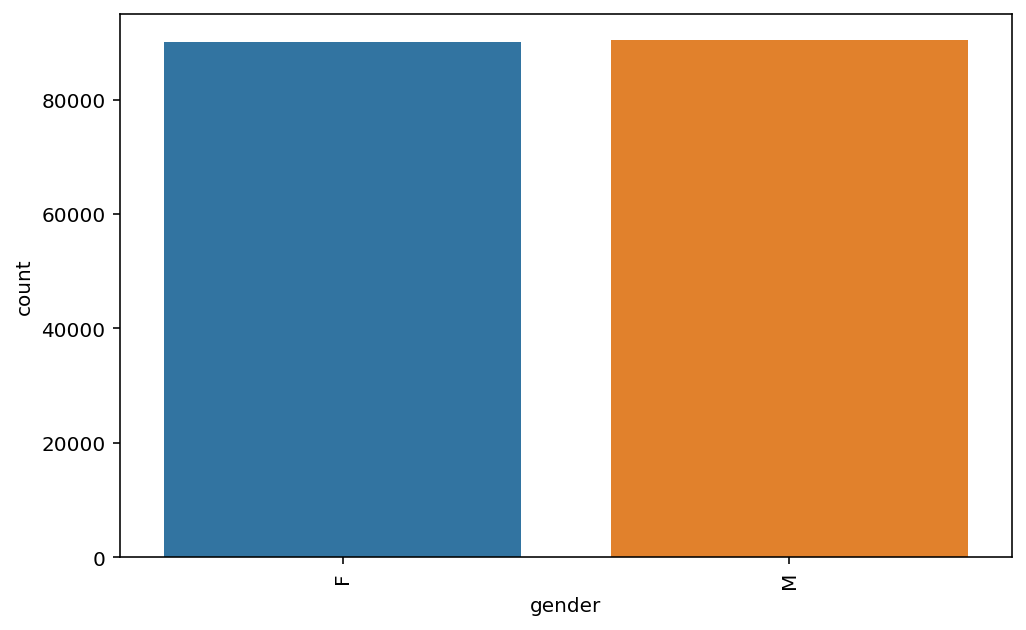

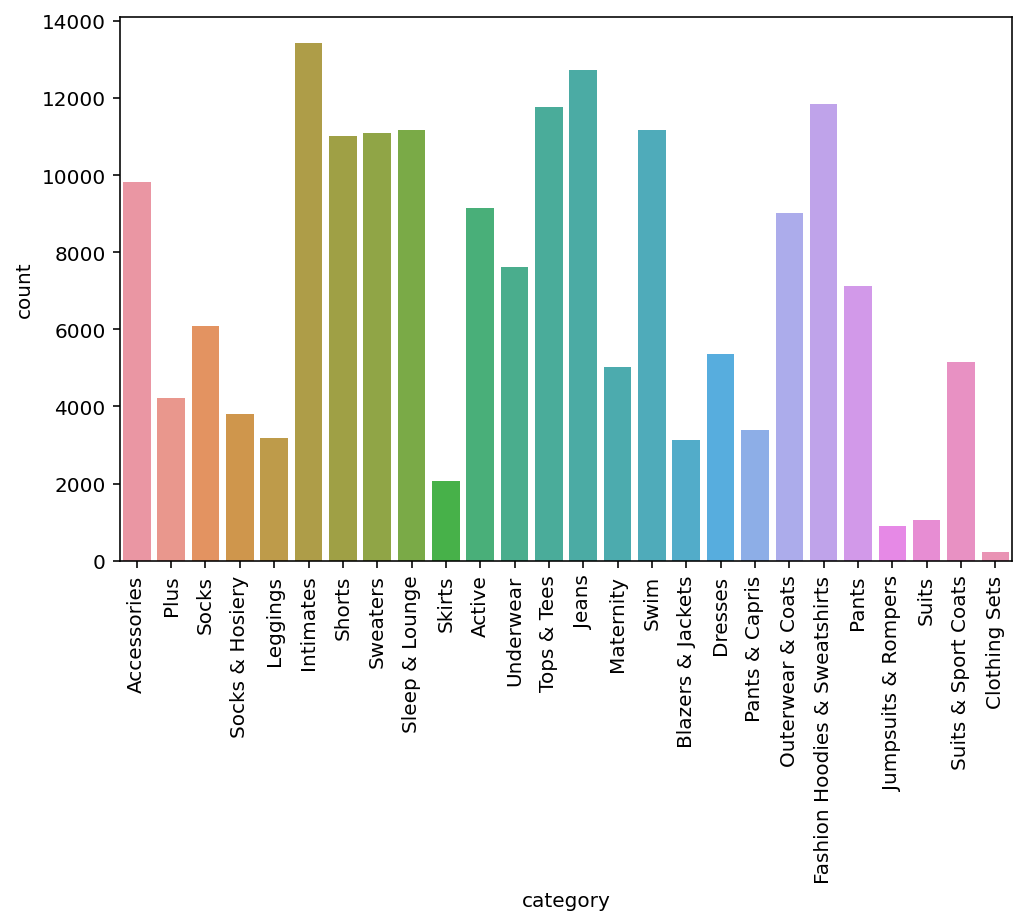

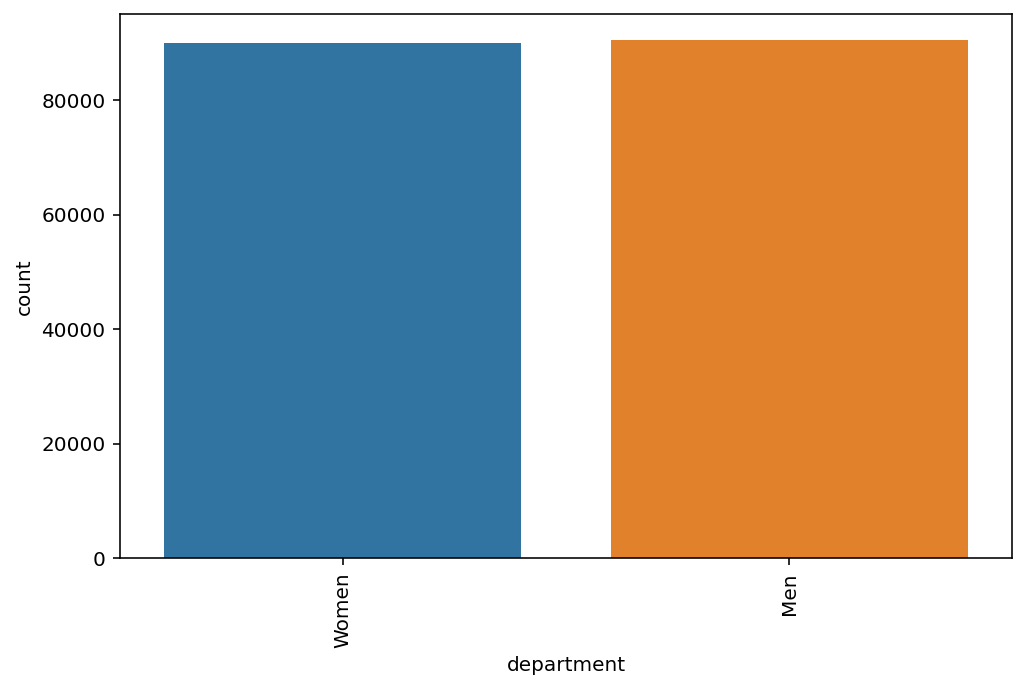

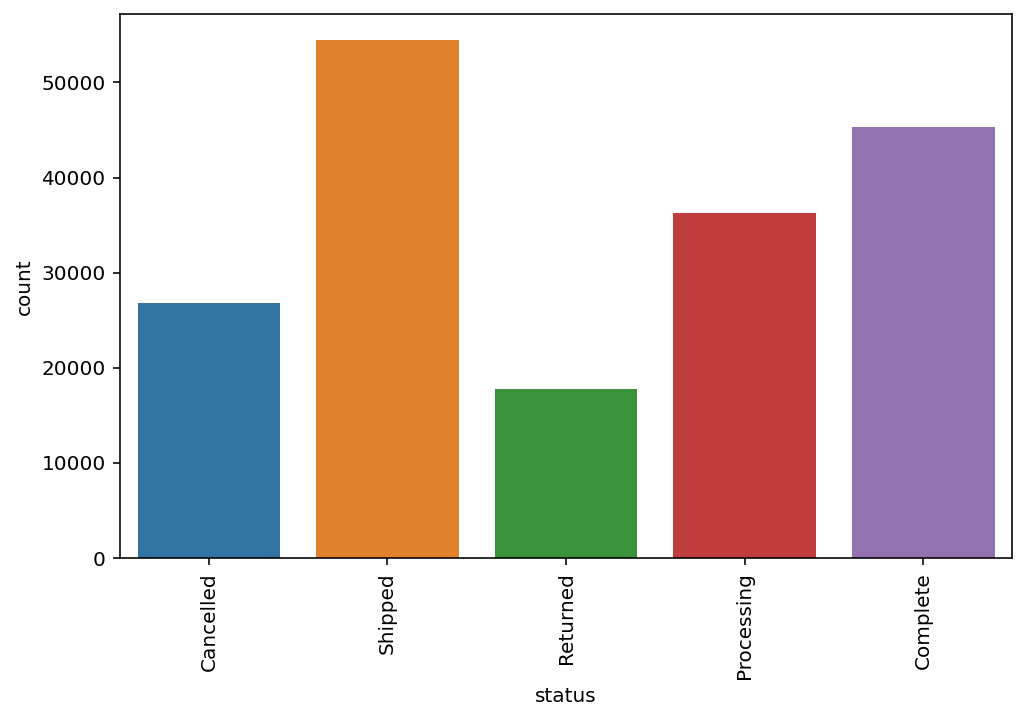

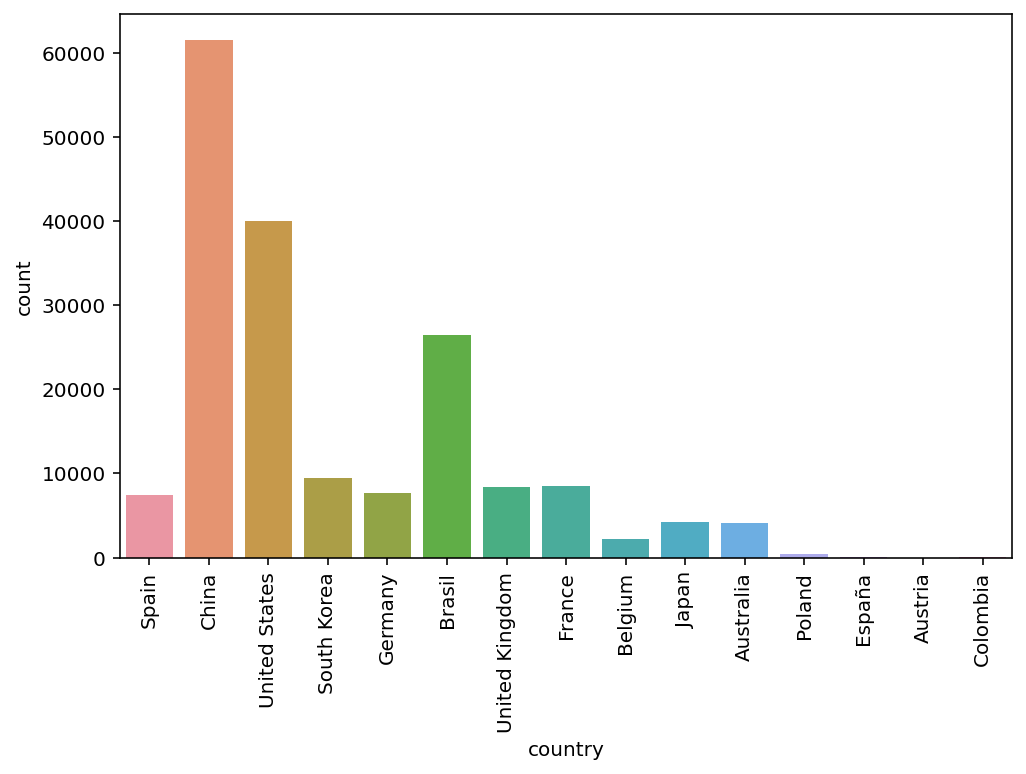

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8,5)
# melihat jumlah masing-masing value pada features categorical
kategorikal= ['gender', 'category', 'department',
 'status', 'country']
for f in kategorikal:
  sns.countplot(x=f, data=df)
  plt.xticks(rotation=90)
  plt.show()

**Insight** 
Bar  graph di atas menunjukkan jumlah pemesanan berdasarkan variabel, yaitu:


1.   Dari variabel **gender(jenis kelamin)**, jumlah laki-laki dan perempuan yang melakukan pemesanan tidak jauh berbeda yaitu kurang lebih ada sekitar 90ribu pemesanan.
2.   Dari variabel **category (kategori produk)**, jumlah pemesanan terbanyak ada pada kategori intimates.
3. Dari variabel **department (departemen produk)** tidak berbeda dengan variabel **gender** yaitu sama antara jumlah produk yang dipesan oleh pembeli laki-laki dan perempuan.
4. Dari variabel **status (status pemesanan)** jumlah pemesanan dengan status shipped (dikemas) menempati urutan pertama sedangkan status pemesanan yang sudah selesai (complete) menempati urutan kedua.
5. Dari variabel **country(negara)** negara dengan jumlah pemesanan terbanyak adalah negara China.

---



---





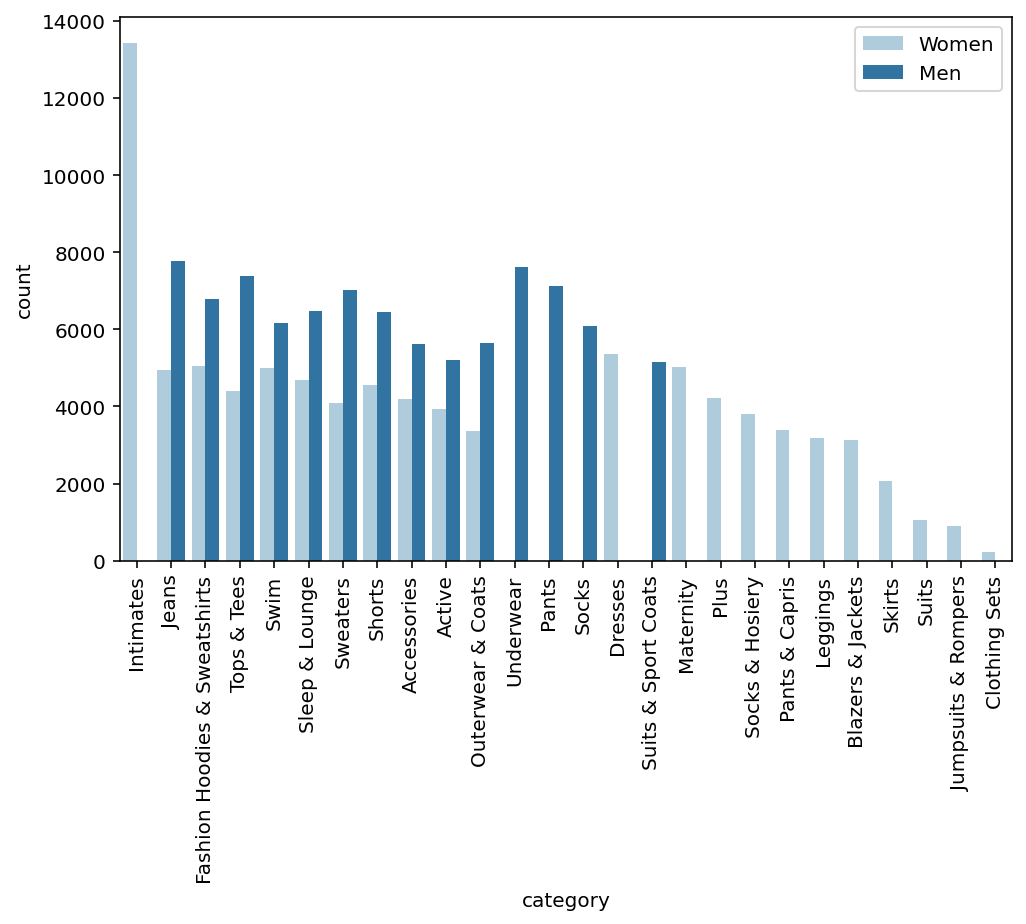

In [ ]:
#Mendefinisikan 
def plot_count(data, x=None, y=None, palette="Paired", figsize=(), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs)
    plt.grid(False)

#Membuat diagram batang
plot_count(x="category", hue="department",data=df, palette="Paired",figsize=(8, 5))
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

**Insight** Dari bar graph di atas menunjukkan jumlah pemesanan pada masing-masing kategori produk dan dispesifikan lagi berdasarkan jenis kelamin.

---



---



In [ ]:
# melihat missing value dan tipe data masing-masing variabel
print("Database memiliki {} data customer and {} kolom variabel.".format(df.shape[0],df.shape[1]))
print("Missing values masing-masing kolom:\n{}".format(df.isnull().sum()))

Database memiliki 180508 data customer and 24 kolom variabel.
Missing values masing-masing kolom:
id                     0
order_id               0
user_id                0
gender                 0
age                    0
product_id             0
category               0
department             0
status                 0
created_at             0
shipped_at         63006
delivered_at      117473
returned_at       162756
lama_pemesanan    117473
num_of_item            0
sale_price             0
cost                   0
profit_kotor           0
ratio_profit           0
country                0
city                1803
state                  0
latitude               0
longitude              0
dtype: int64


In [ ]:
# melihat kolom yang terdapat missing value dan persentasenya

total= df.isnull().sum().sort_values(ascending = False)
percent= (df.isnull().sum()/
           df.isnull().count()*100).sort_values(ascending = False)
missing_df= pd.concat([total, percent], axis=1, 
                        keys=['Total Missing Value', 'Percent'])
missing_df.head()

,Total Missing Value,Percent
returned_at,162756,90.165533
lama_pemesanan,117473,65.079110
delivered_at,117473,65.079110
shipped_at,63006,34.904824
city,1803,0.998848


**Missing Value**
Dari data yang digunakan terdapat missing value di beberapa variabel, yaitu:


1.   Pada **returned_at** terdapat sekitar 90% missing value, hal ini wajar karena **returned_at** adalah waktu pengembalian pesanan yang mana tidak semua pemesanan barang itu akan direturn.
2.   Pada **delivered_at** terdapat sekitar 65% missing value, hal ini juga wajar karena **delivered_at** adalah waktu pengiriman yang mana belum semua pesanan sudah dilakukan pengiriman.
3. Pada **lama_pemesanan** terdapat sekitar 65% missing value. Lama pemesanan dihitung dengan waktu pengiriman dikurangi dengan waktu pesanan dibuat, dan masih terdapat pesanan yang belum dikirim sehingga wajar jika ada missing value di variabel ini.
4. Pada **shipped_at** terdapat hampir 34% missing value.
5. Pada **City** terdapat hampir sekitar 1% missing value.

---



---





## Exploratory Data Analysis: Data Numerikal

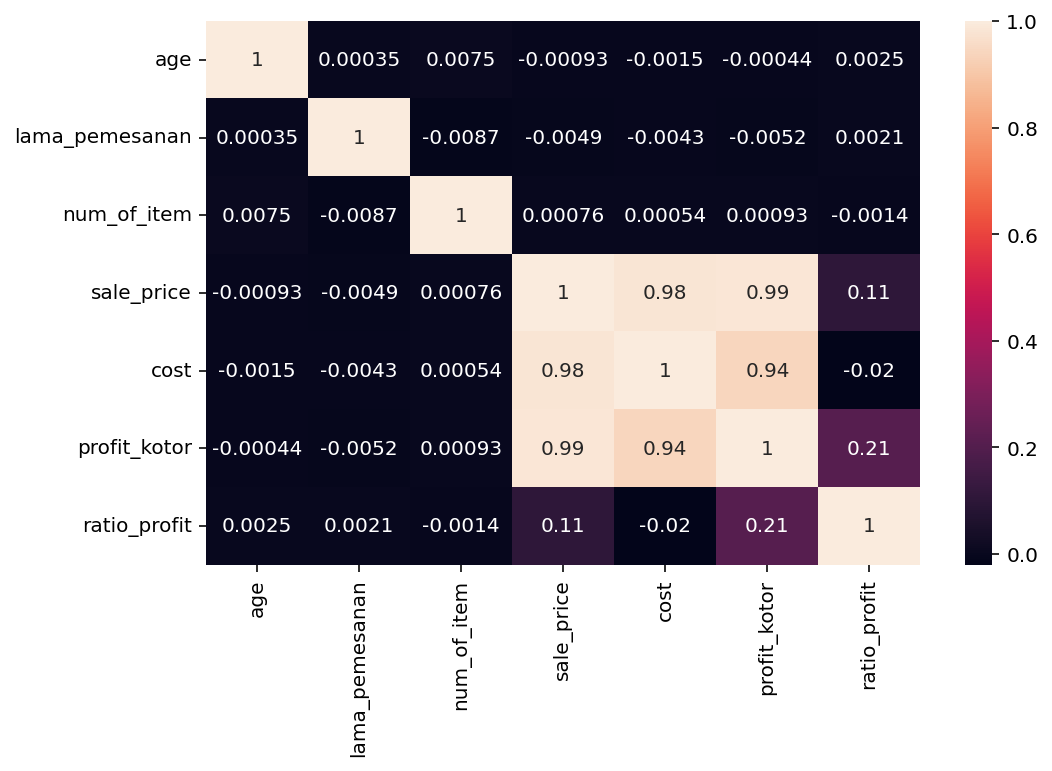

In [ ]:
# Visualisasikan hubungan antara variabel numerik pada df (data)

sns.heatmap(df.corr(), annot=True)
plt.show()

**Insight** Dari heatmap di atas dapat dilihat bahwa **sale_price dengan cost**, **sale_price dengan profit_kotor**, dan **cost dengan profit_kotor** memiliki nilai korelasi yang mendekati 1 artinya hubungan variabel tersebut berkorelasi kuat positif dan dapat diartikan bahwa sale_price, cost, dan profit_kotor memiliki karakteristik yang mirip.


---



---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b072cead0>,
      dtype=object)

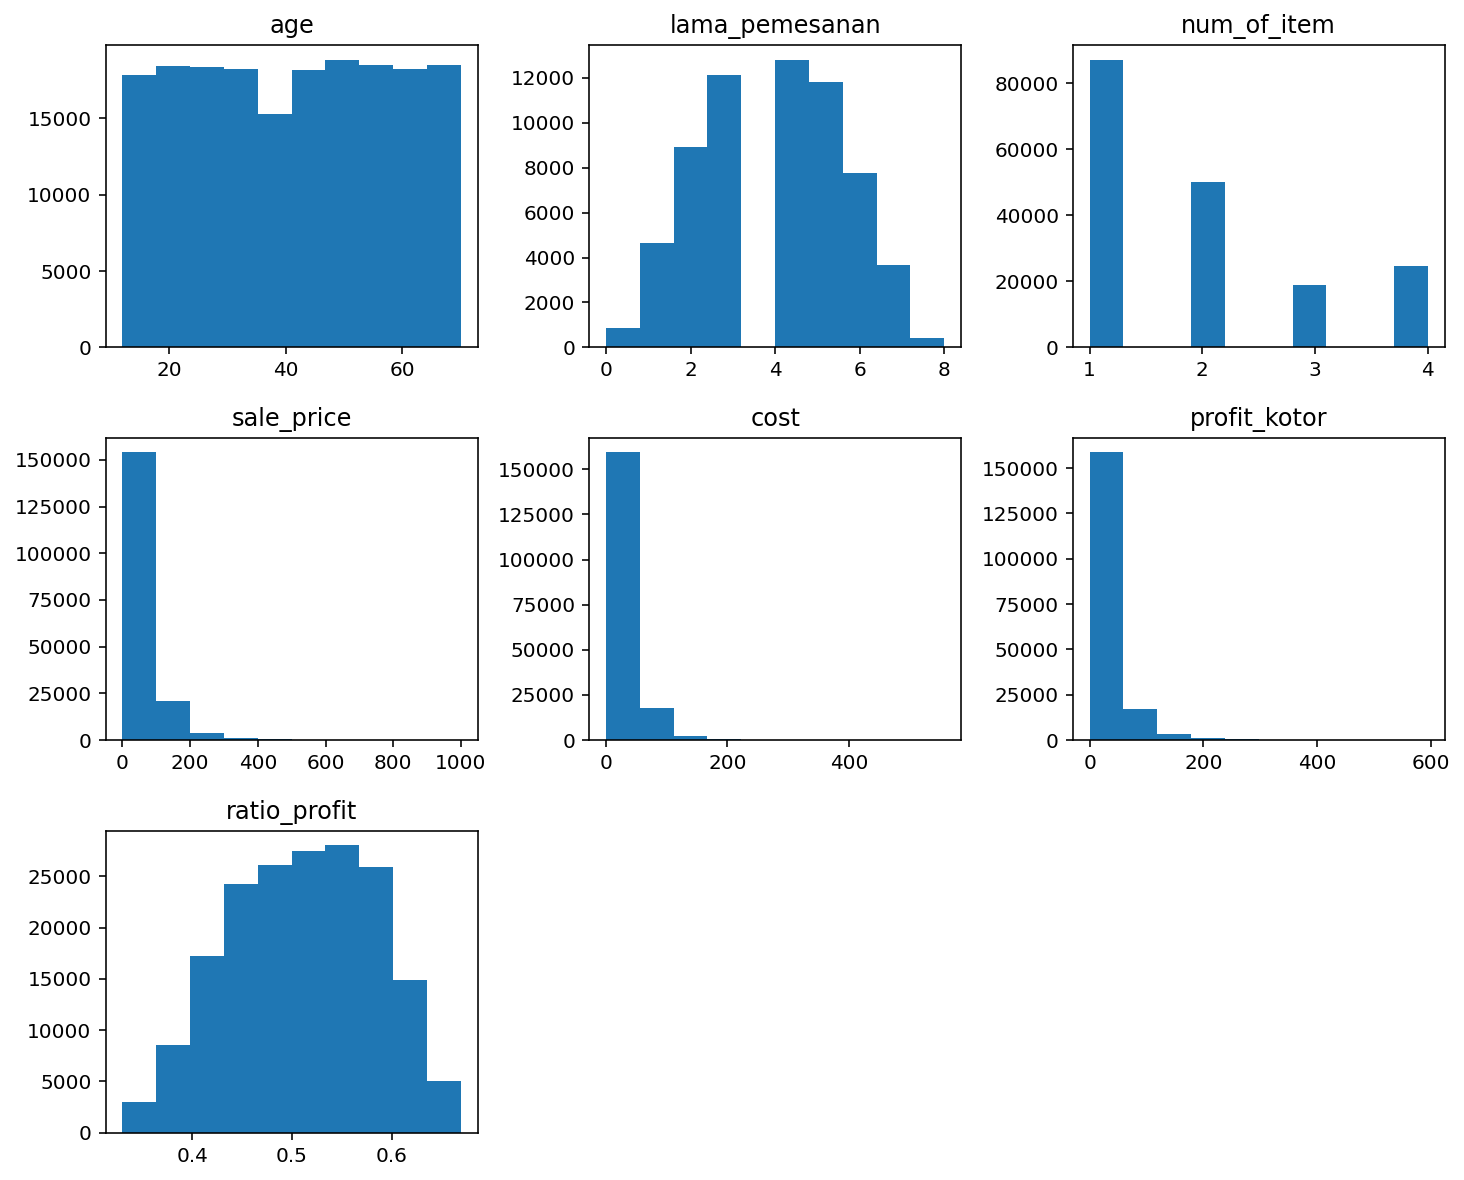

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12, 10) #Menentukan ukuran visualisasi

df.hist(grid=False) #Membuat histogram dari dataset

**Insigth** Dari histogram di atas, pada variabel num_of_item, sale_price, cost, dan profit_kotor memiliki bentuk distribusi condong ke kanan.

---



---



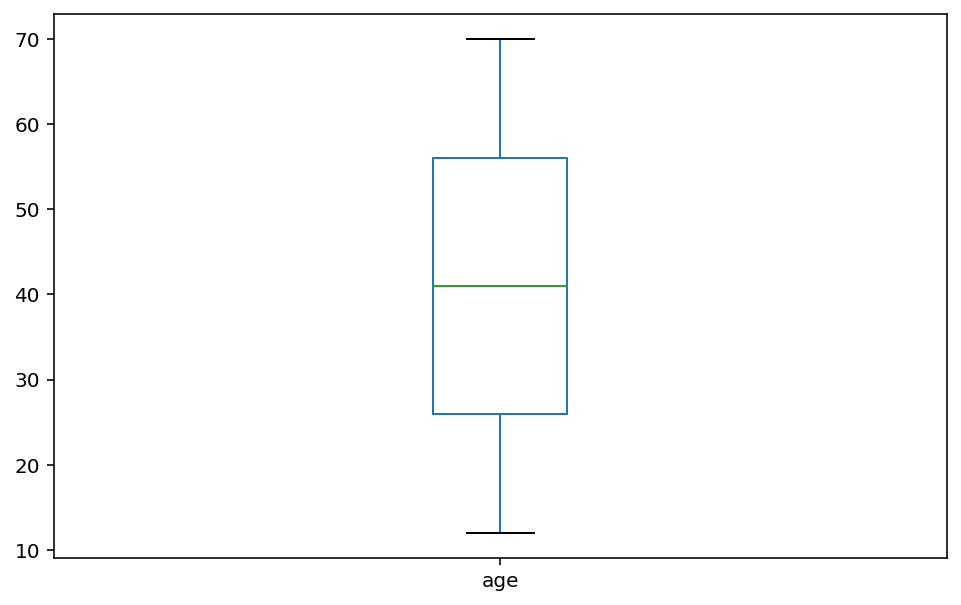

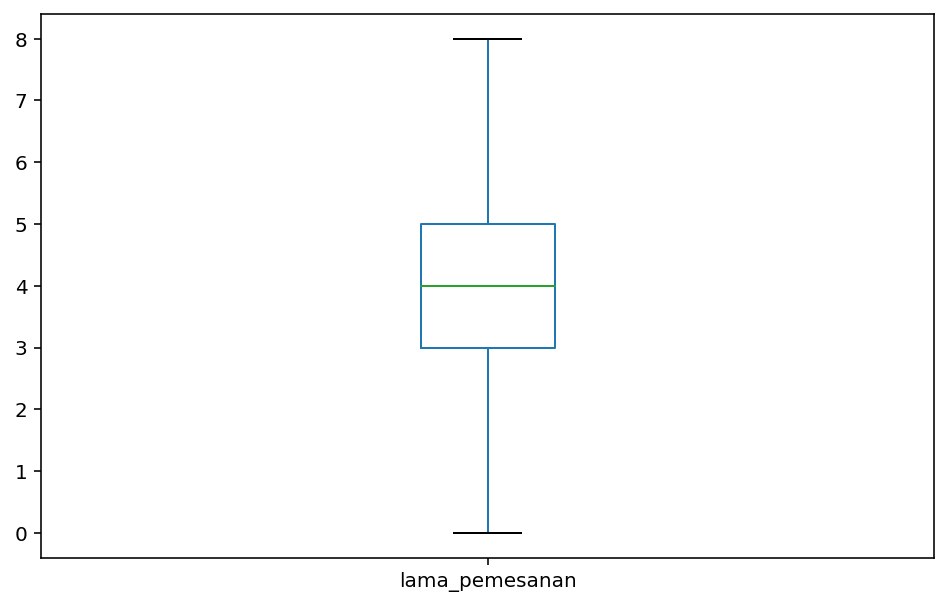

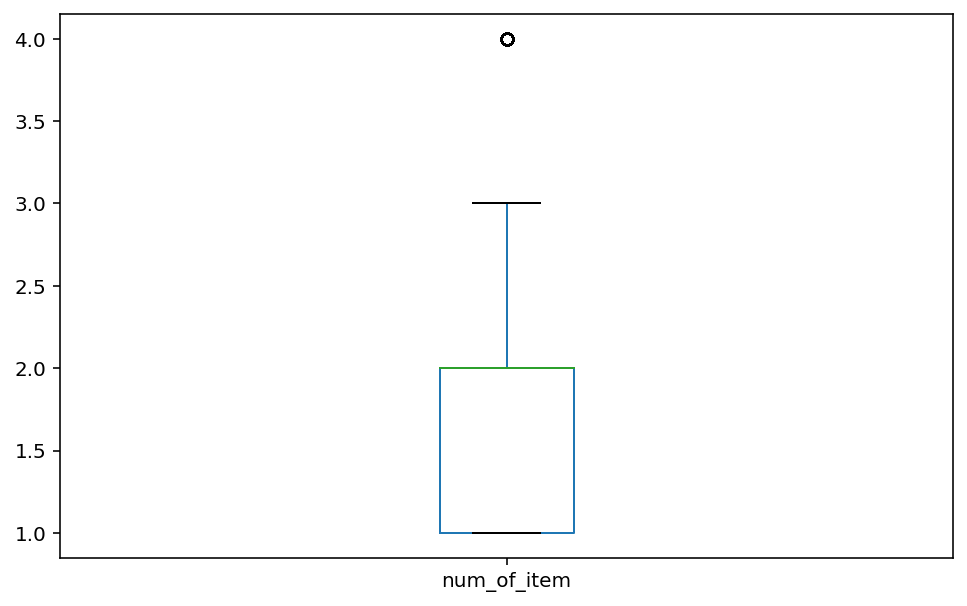

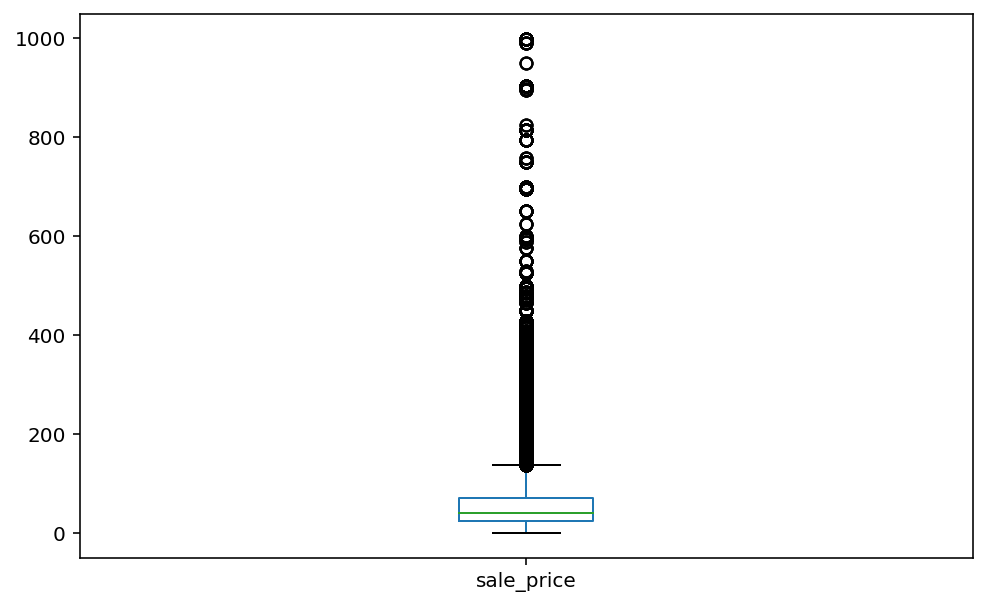

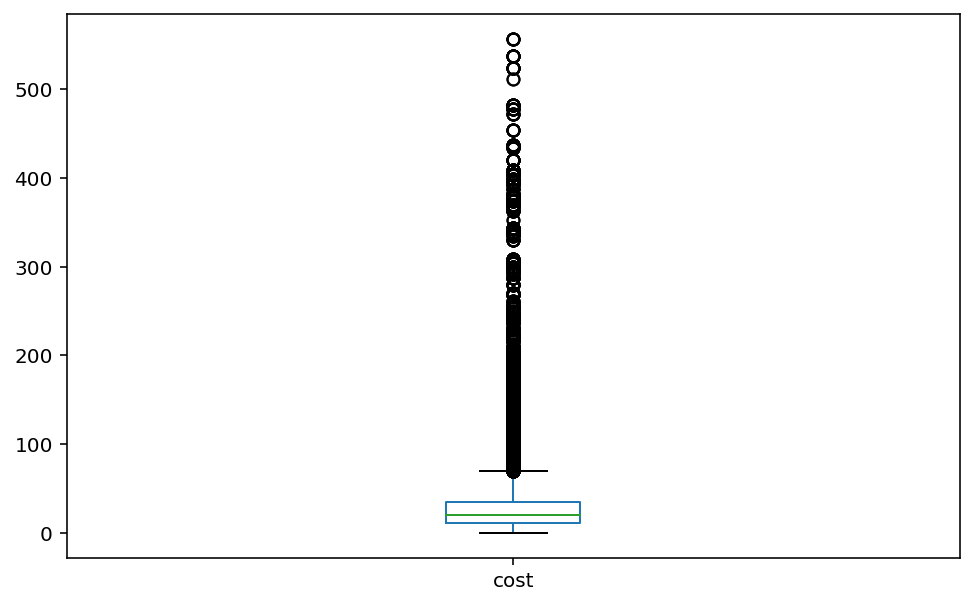

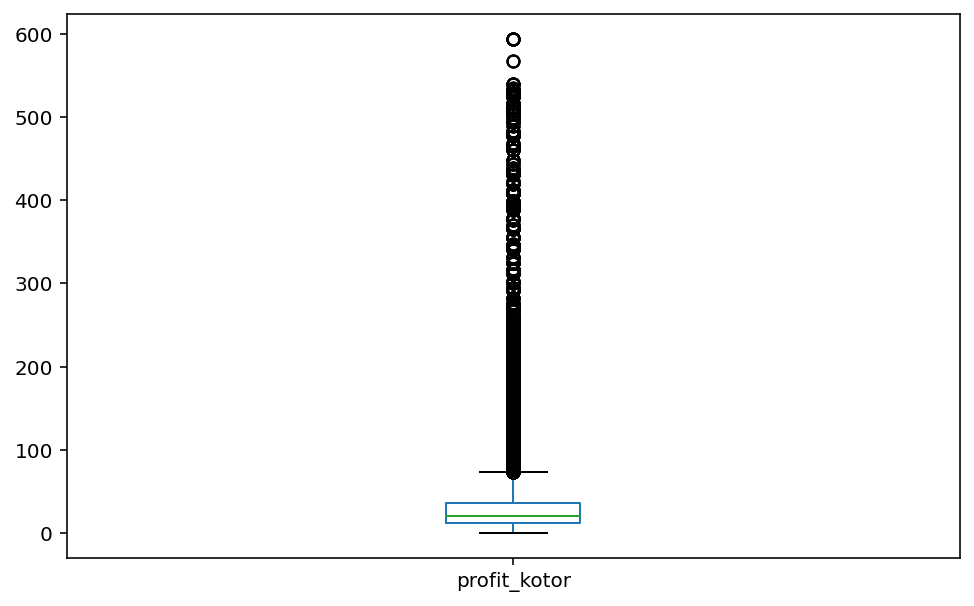

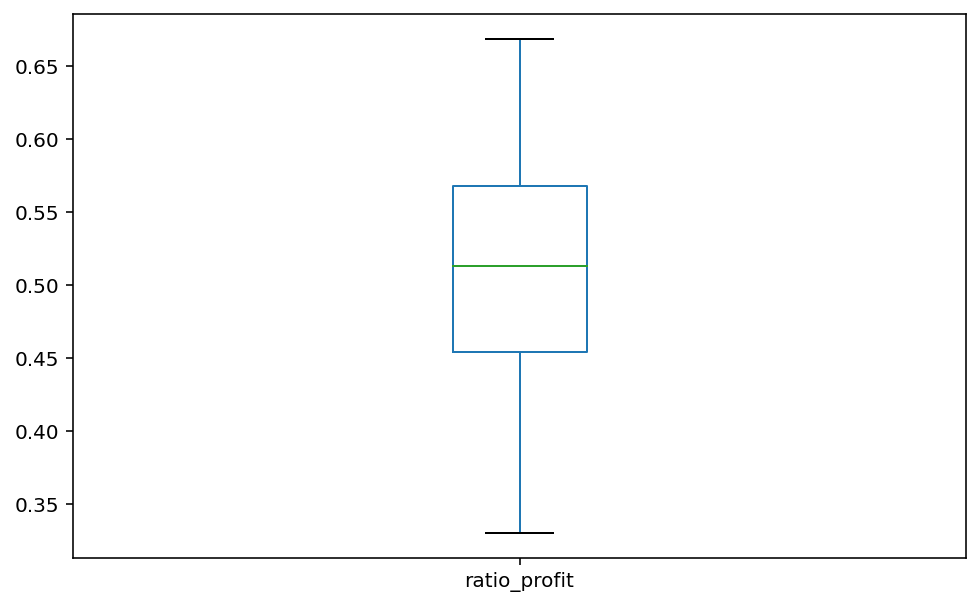

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8, 5)

# mendefinisikan fungsi untuk memanggil boxplot
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

# melihat jumlah masing-masing value pada features categorical
numerikal= ['age', 'lama_pemesanan', 'num_of_item','sale_price','cost','profit_kotor', 'ratio_profit']
for n in numerikal:
  plot_boxplot(df, ft=n)
  plt.show()

**Insight** Dari boxplot di atas dapat dilihat bahwa pada variabel num_of_item, sale_price, cost, dan profit_kotor memiliki outlier.

---



---



### Mengatasi Outliers Menggunakan IQR




Cara pertama untuk mengatasi outliers adalah menggunakan IQR

In [ ]:
# Mengatasi outlier
# mendefinisikan fungsi untuk memanggil 'outliers' 
# IQR=Q3-Q1
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  batas_bawah= Q1- 1.5 * IQR
  batas_atas= Q3+1.5*IQR

  ol=df.index[(df[ft]< batas_bawah) | (df[ft] > batas_atas)]

  return ol

In [ ]:
index_list=[]
for ol in ['num_of_item','sale_price','cost', 'profit_kotor']:
  index_list.extend(outliers(df, ol))

index_list

[1,
 4,
 7,
 12,
 36,
 46,
 55,
 60,
 63,
 66,
 74,
 78,
 82,
 95,
 101,
 103,
 105,
 106,
 110,
 114,
 123,
 124,
 130,
 146,
 147,
 148,
 152,
 153,
 157,
 173,
 186,
 195,
 198,
 202,
 209,
 223,
 236,
 238,
 270,
 314,
 316,
 317,
 326,
 327,
 328,
 331,
 343,
 356,
 366,
 373,
 378,
 381,
 388,
 389,
 396,
 400,
 425,
 426,
 437,
 440,
 446,
 447,
 448,
 449,
 451,
 453,
 460,
 462,
 464,
 470,
 474,
 476,
 482,
 492,
 506,
 513,
 516,
 517,
 520,
 524,
 532,
 533,
 539,
 548,
 572,
 578,
 581,
 585,
 592,
 599,
 604,
 624,
 626,
 629,
 642,
 666,
 680,
 686,
 688,
 694,
 697,
 709,
 714,
 723,
 724,
 726,
 727,
 728,
 745,
 759,
 761,
 765,
 767,
 773,
 774,
 787,
 788,
 801,
 817,
 818,
 819,
 822,
 825,
 826,
 827,
 831,
 832,
 843,
 878,
 885,
 889,
 890,
 907,
 912,
 916,
 938,
 940,
 949,
 955,
 957,
 974,
 979,
 997,
 1004,
 1013,
 1029,
 1036,
 1048,
 1058,
 1095,
 1141,
 1142,
 1145,
 1147,
 1161,
 1164,
 1179,
 1187,
 1206,
 1211,
 1213,
 1220,
 1227,
 1230,
 1236,
 1247

In [ ]:
# mendefinisikan fungsi untuk memanggil 'hapus' (hapus outliers)

def remove(df, ol):
  ol=sorted(set(ol))
  df=df.drop(ol)
  return df
  

In [ ]:
df_cleaned= remove(df, index_list)
df_cleaned.shape

(140066, 24)

Dilihat dari bentuk data yang sudah dibersihkan outliers-nya menggunakan IQR, data berukuran 140066 baris. Artinya sekitar 40ribu baris dibersihkan dari pembersihan outliers ini.

---



---



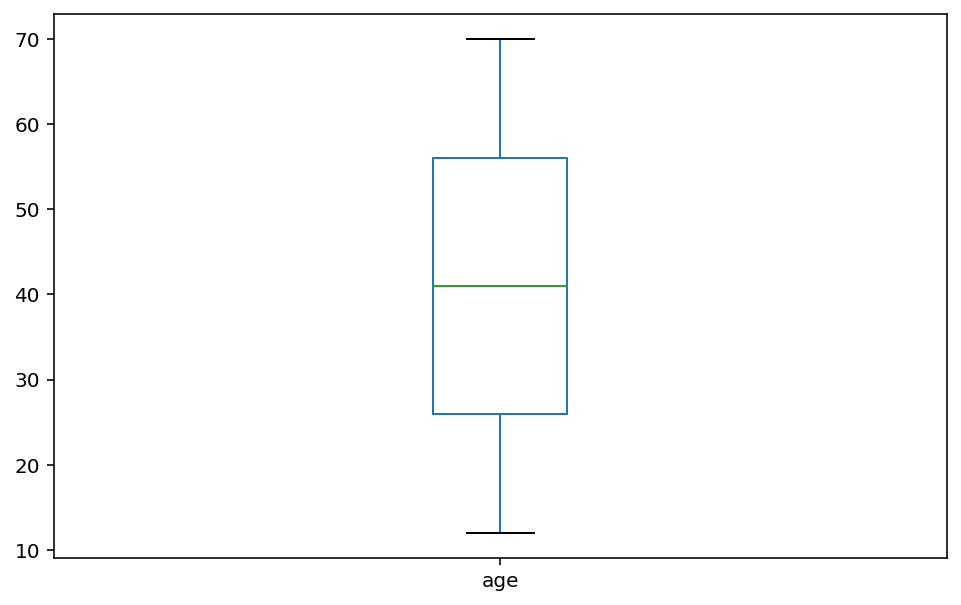

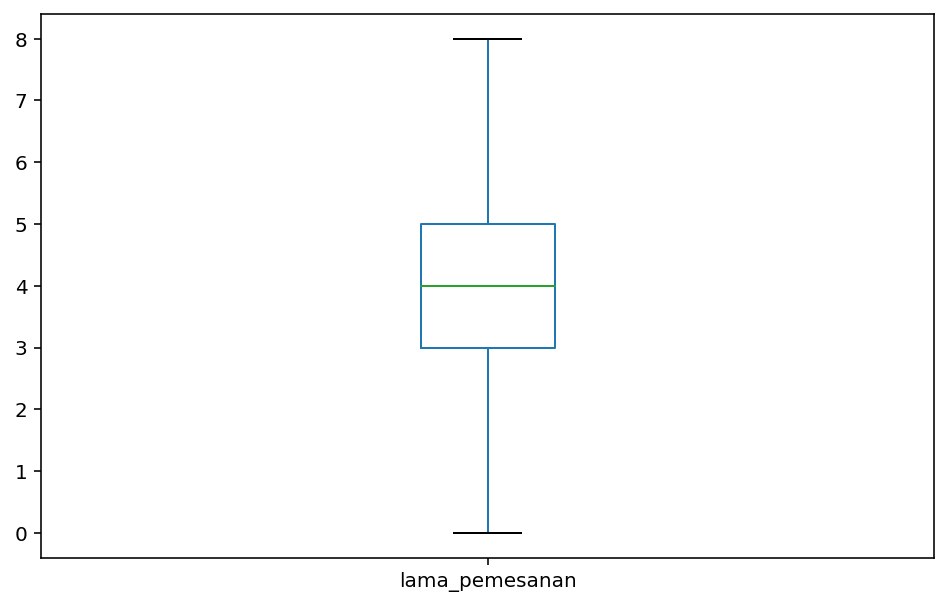

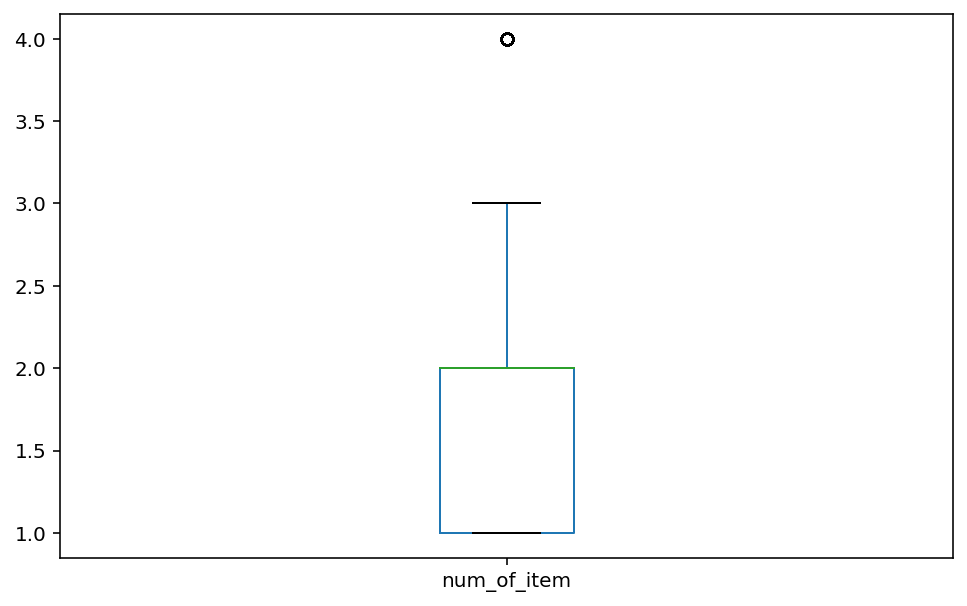

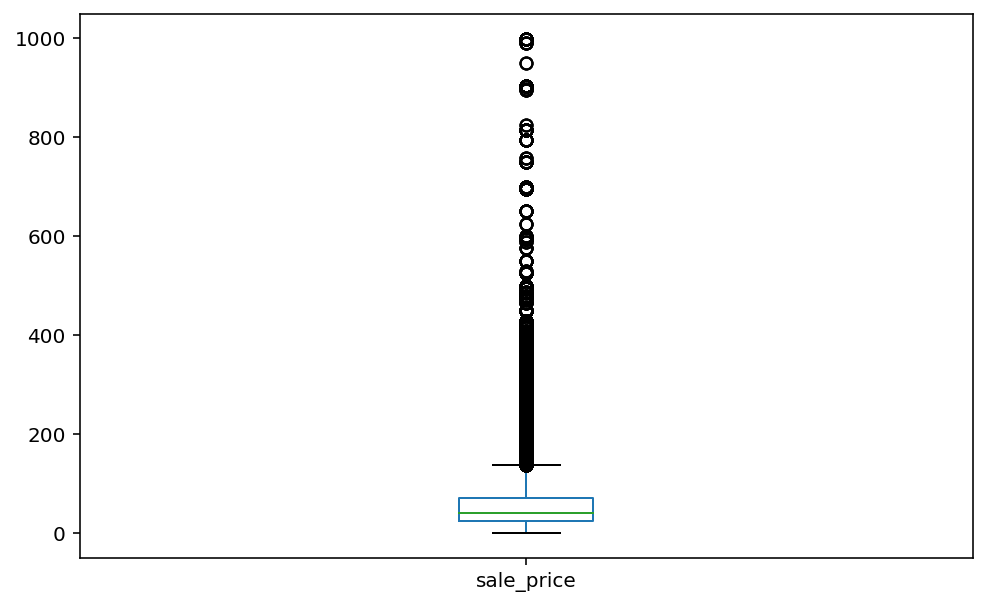

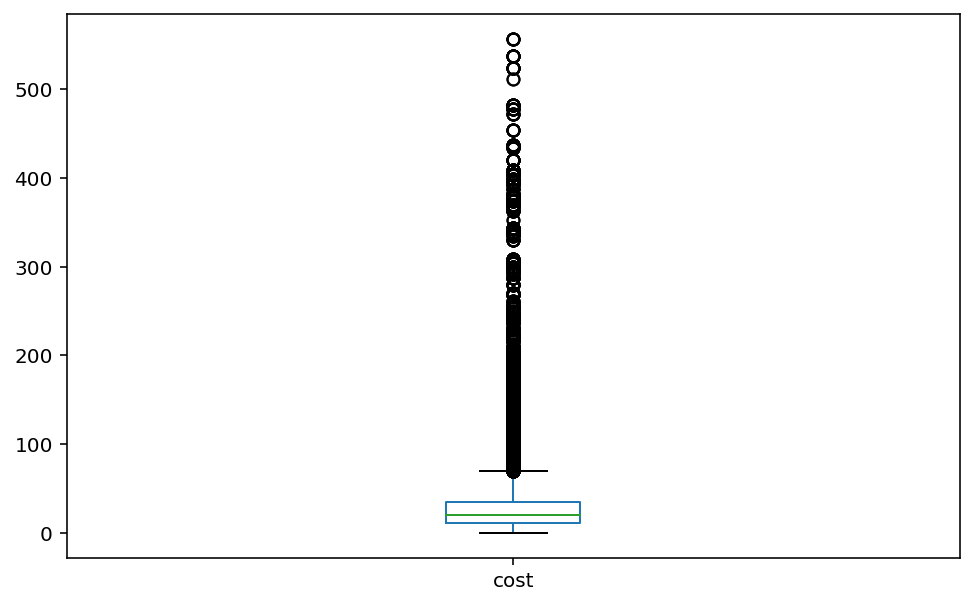

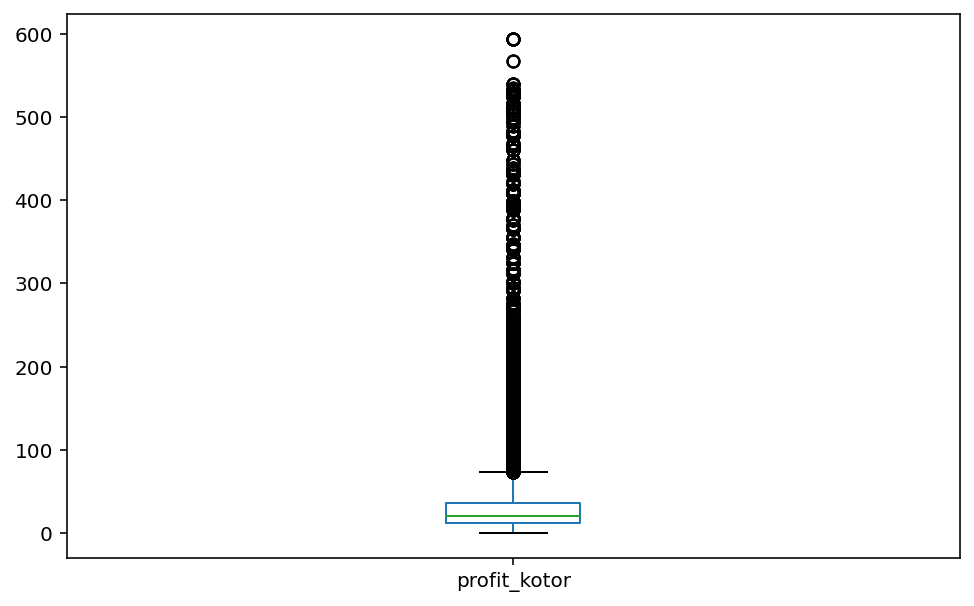

In [ ]:
# mendefinisikan fungsi untuk memanggil boxplot
def plot_boxplot(df_cleaned, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

# melihat jumlah masing-masing value pada features categorical
numerikal= ['age', 'lama_pemesanan', 'num_of_item','sale_price','cost','profit_kotor']
for n in numerikal:
  plot_boxplot(df_cleaned, ft=n)
  plt.show()

Setelah dibersihkan outliers-nya menggunakan IQR, masih terdapat outlier di variabel num_of_item, sale_price, cost, dan profit_kotor.

---



In [ ]:
df_cleaned.info() #info dari dataset yang telah dibersihkan outliernya menggunakan IQR

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140066 entries, 0 to 180507
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              140066 non-null  object 
 1   order_id        140066 non-null  object 
 2   user_id         140066 non-null  object 
 3   gender          140066 non-null  object 
 4   age             140066 non-null  int64  
 5   product_id      140066 non-null  object 
 6   category        140066 non-null  object 
 7   department      140066 non-null  object 
 8   status          140066 non-null  object 
 9   created_at      140066 non-null  object 
 10  shipped_at      90949 non-null   object 
 11  delivered_at    48915 non-null   object 
 12  returned_at     13828 non-null   object 
 13  lama_pemesanan  48915 non-null   float64
 14  num_of_item     140066 non-null  int64  
 15  sale_price      140066 non-null  float64
 16  cost            140066 non-null  float64
 17  profit_kot

In [ ]:
df_cleaned.describe().T #deskripsi dataset yang telah dibersihkan outliernya menggunakan IQR

,count,mean,std,min,25%,50%,75%,max
age,140066.0,41.087951,16.991825,12.0000,26.000,41.0000,56.000,70.000000
lama_pemesanan,48915.0,3.891199,1.715750,0.0000,3.000,4.0000,5.000,8.000000
num_of_item,140066.0,1.562363,0.698151,1.0000,1.000,1.0000,2.000,3.000000
sale_price,140066.0,43.289444,27.785760,0.0200,22.500,36.0000,59.000,136.270004
cost,140066.0,21.191124,13.734521,0.0083,10.700,17.8640,28.910,69.668500
profit_kotor,140066.0,22.098320,14.865015,0.0117,11.025,18.2095,29.260,72.843121
ratio_profit,140066.0,0.508468,0.071745,0.3300,0.453,0.5100,0.566,0.669000


Dari hasil pembersihan outliers menggunakan IQR, dapat dilihat di variabel sale_price. Sebelum pembersihan, nilai max dari sale_price adalah 999 dollar dan menjadi 136 dollar setelah dilakukan pembersihan outliers menggunakan IQR. 

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b073b2d10>,
      dtype=object)

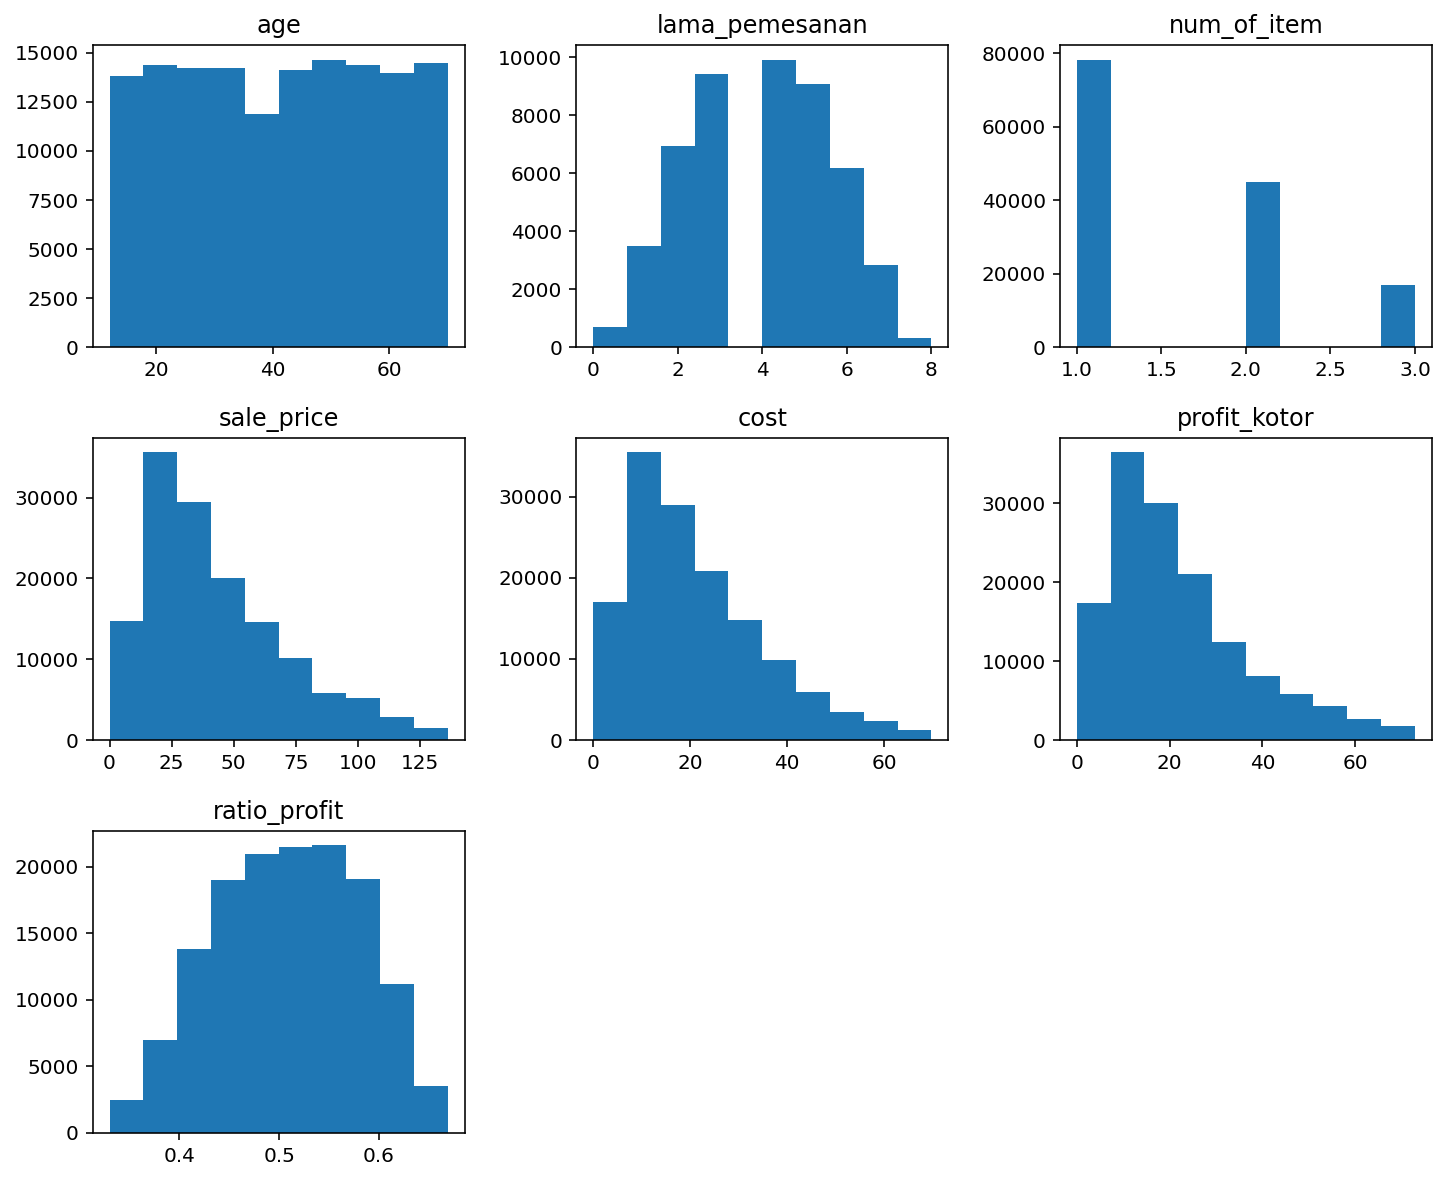

In [ ]:
#Membuat histogram dari data numerik dataset yang telah dibersihkan outliernya menggunakan IQR
matplotlib.rcParams['figure.figsize'] = (12, 10)
df_cleaned.hist(grid=False)

Dari histogram data setelah dibersihkan outliers-nya, beberapa histogram masih condong ke kanan namun lebih terdistribusi dibandingkan data sebelum dibersihkan.

---



In [ ]:
df_cleaned.to_csv('sales_cleaned', index=False) #Menyimpan dataset dalam bentuk csv yang nantinya akan diunduh

### Mengatasi Outliers dengan Transformasi Log

In [ ]:
df_log=pd.read_csv('/content/drive/MyDrive/My final project/sales.csv') #Mendefinisikan dataset yang akan digunakan

In [ ]:
# Mengubah data yangn belum sesuai features nya yaitu untuk data dengan nama yang memuat 'id'
# Instruksi looping untuk mengubah tipe data pada kolom "latitude", "longitude", 
# dan fitur yang berakhiran dengan 'id' menggunakan function astype()
for feature in df_log.columns:
    if (feature.endswith("id") or feature.endswith("latitude") or feature.endswith("longitude")):
        df_log[feature] = df_log[feature].astype("object")

# Melihat kembali fitur kategoris dan numerik yang ada pada tabel

numerical_features = df_log.select_dtypes(include="number").columns.tolist()
categorical_features = df_log.select_dtypes(include="object").columns.tolist()

print("Numerical features antara lain:")
pprint(numerical_features, compact= True)
pprint("------------------------------------------------------------------------")
print("Categorical features antara lain:")
pprint(categorical_features, compact=True)

Numerical features antara lain:
['age', 'lama_pemesanan', 'num_of_item', 'sale_price', 'cost', 'profit_kotor',
 'ratio_profit']
'------------------------------------------------------------------------'
Categorical features antara lain:
['id', 'order_id', 'user_id', 'gender', 'product_id', 'category', 'department',
 'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at', 'country',
 'city', 'state', 'latitude', 'longitude']


In [ ]:
#log transform skewed numeric features:
numeric_feats = df_log.dtypes[df_log.dtypes != "object"].index

skewed_feats = df_log[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_log[skewed_feats] = np.log1p(df_log[skewed_feats])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b05841e10>,
      dtype=object)

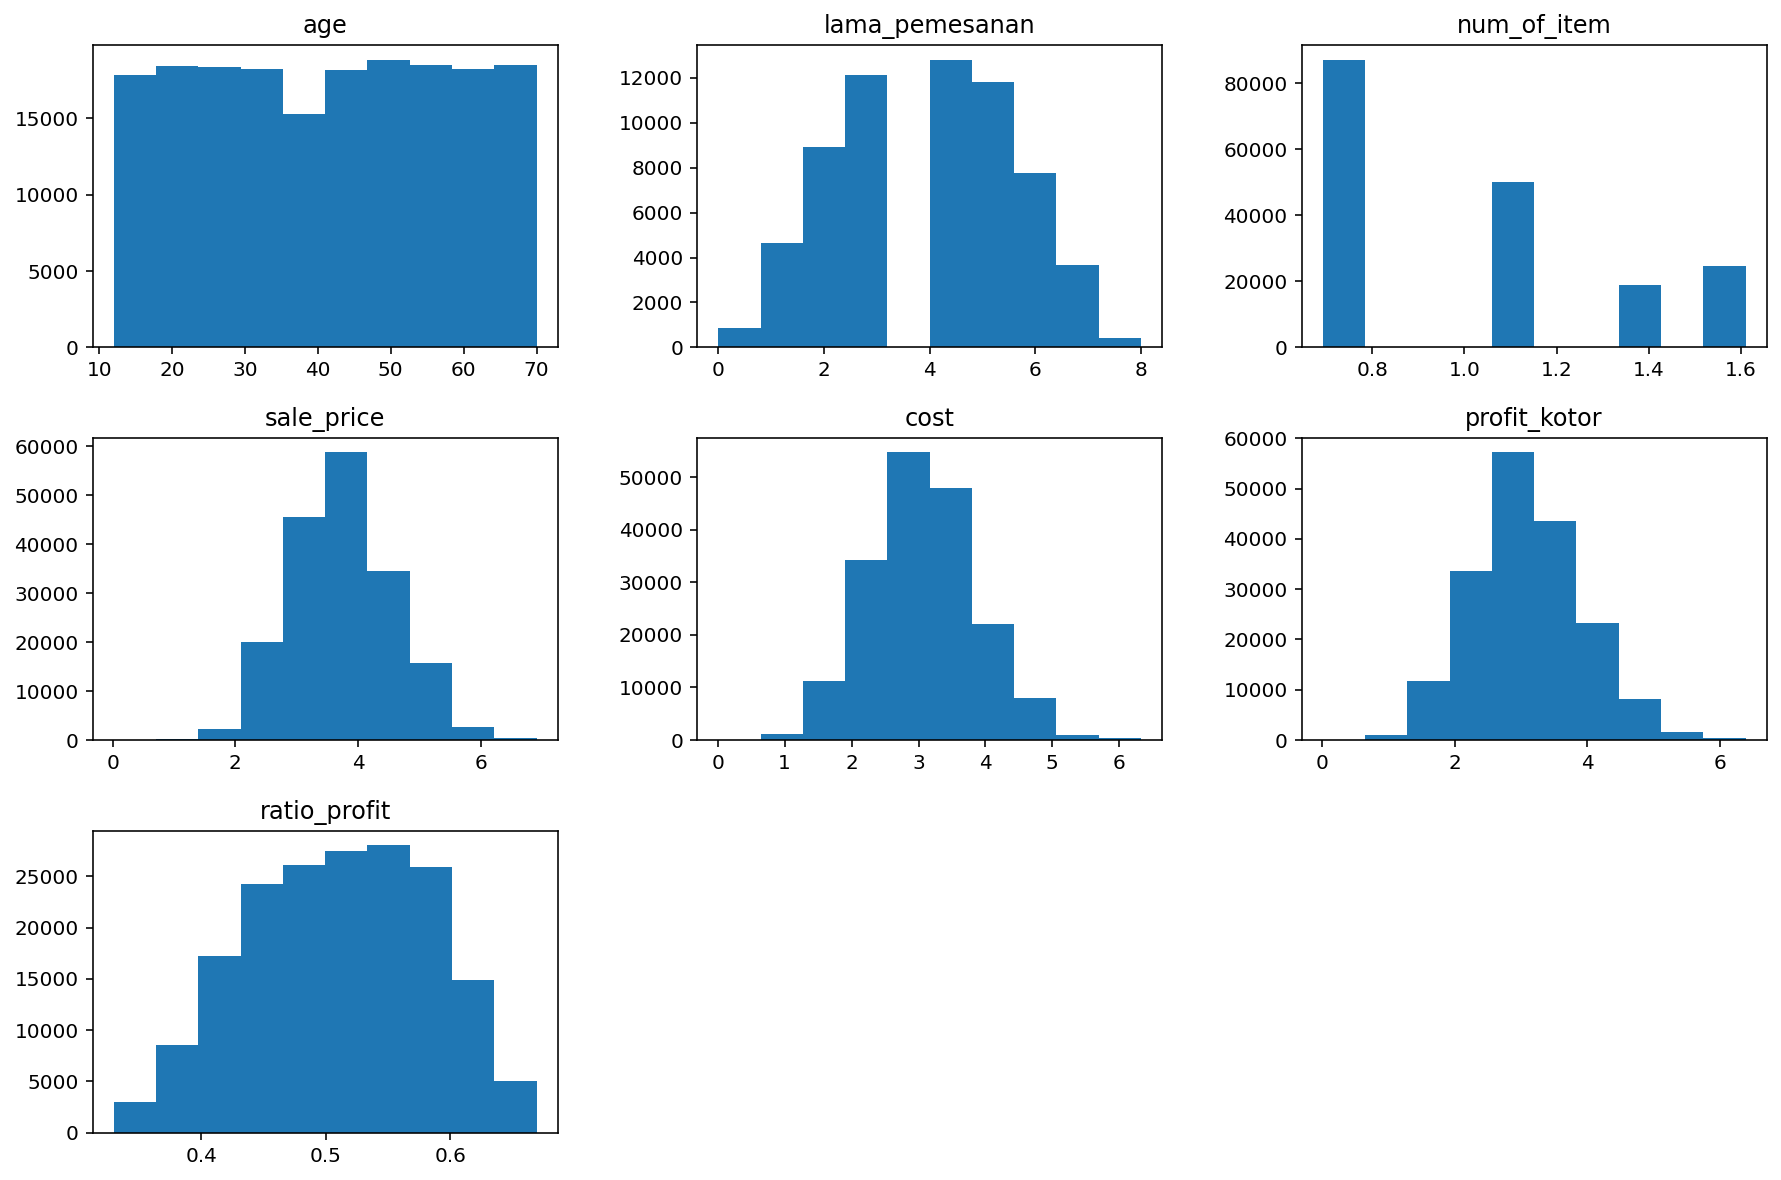

In [ ]:
#Membuat histogram dari dataset yang telah dibersihkan outliernya menggunakan transformasi log
matplotlib.rcParams['figure.figsize'] = (15, 10)
df_log.hist(grid=False)

Dari pembersihan outlier menggunakan transformasi log, menghasilkan histogram yang mendekati distribusi normal.

---



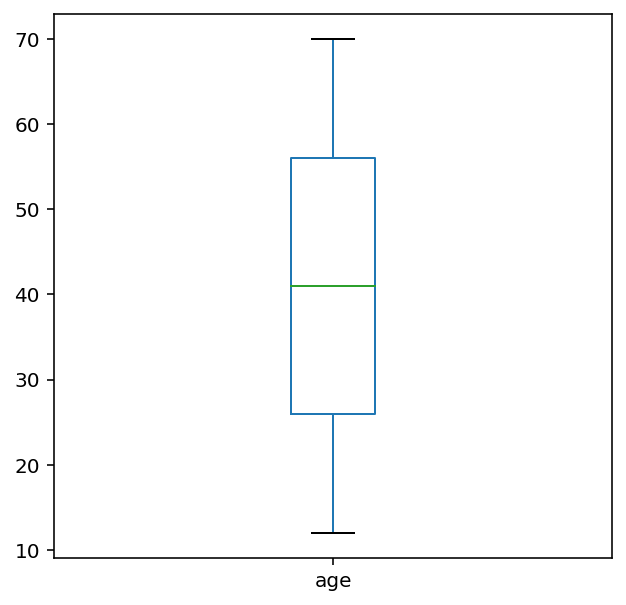

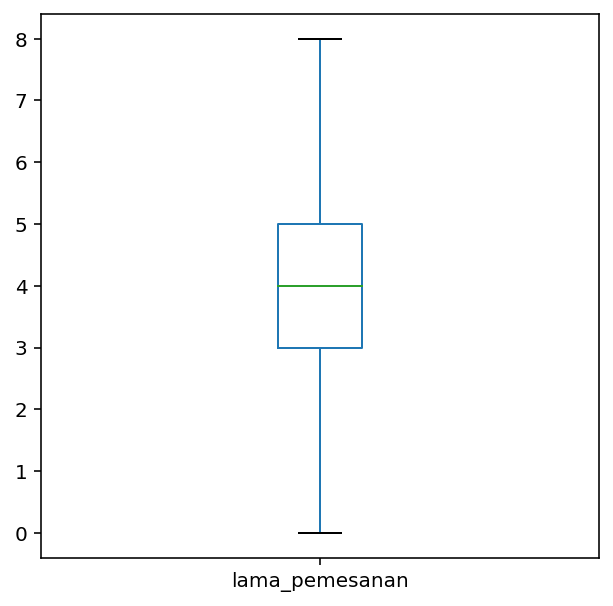

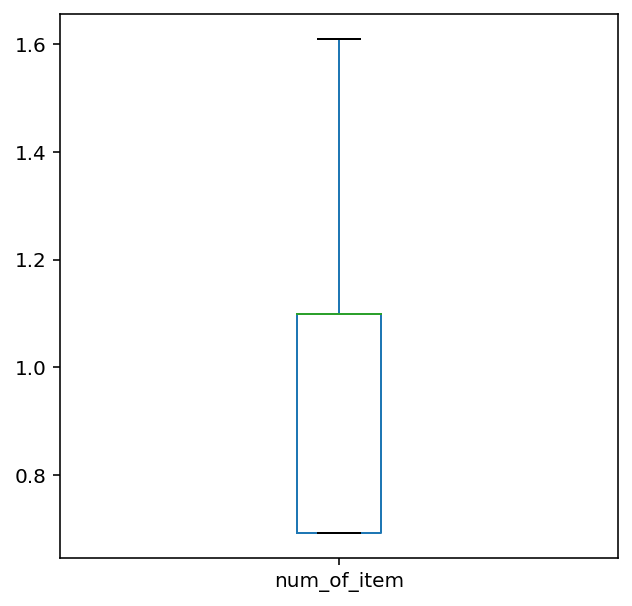

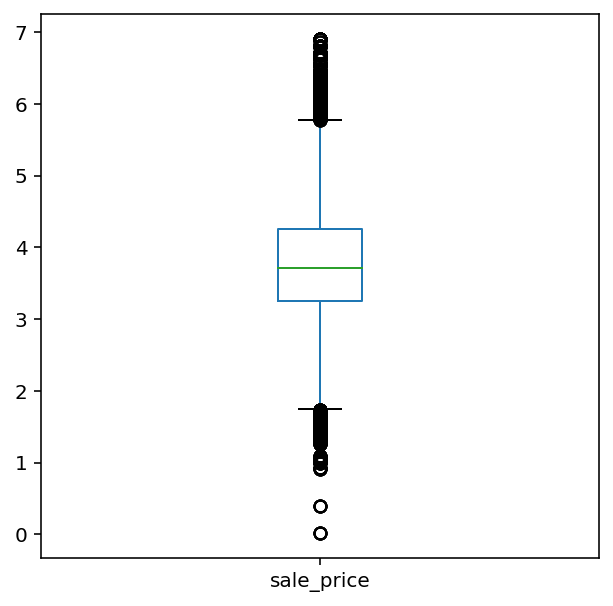

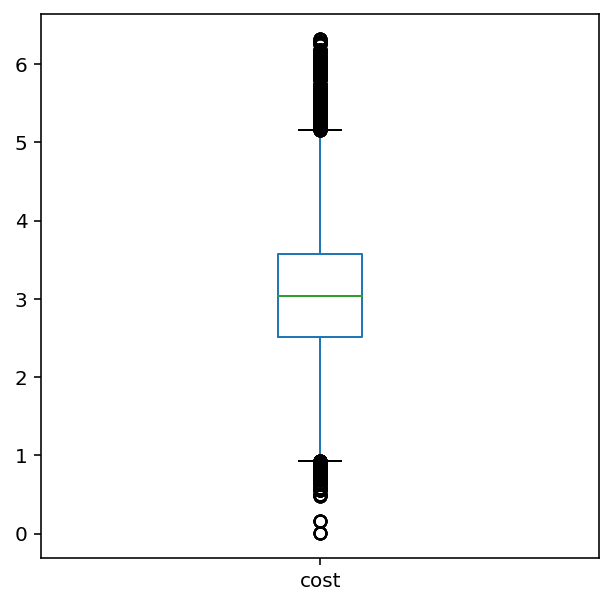

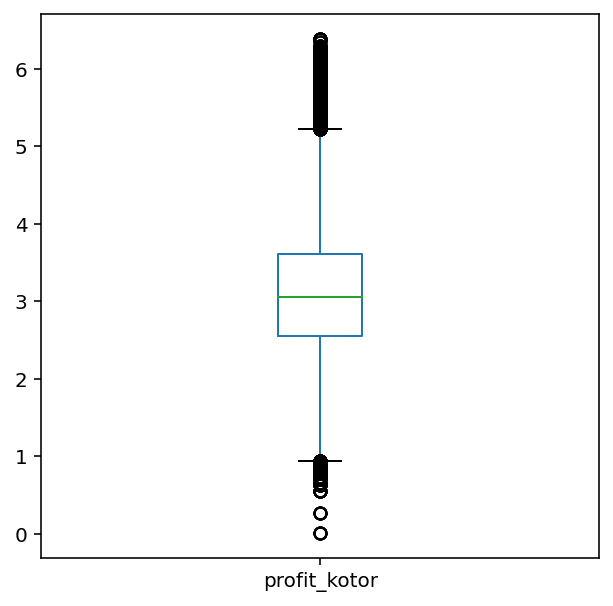

In [ ]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
# mendefinisikan fungsi untuk memanggil boxplot
def plot_boxplot(df_log, ft):
  df_log.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

# melihat jumlah masing-masing value pada features categorical
numerikal= ['age', 'lama_pemesanan', 'num_of_item','sale_price','cost','profit_kotor']
for n in numerikal:
  plot_boxplot(df_log, ft=n)
  plt.show()

Setelah outliers dibersihkan dengan menggunakan transformasi log menghasilkan boxplot seperti pada gambar di atas. Masih terdapat outliers, namun jumlahnya lebih berkurang dibandingkan data asli dan data yang dibersihkan dengan menggunakan IQR.

---



In [ ]:
df_log.head()

,id,order_id,user_id,gender,age,product_id,category,department,status,created_at,...,num_of_item,sale_price,cost,profit_kotor,ratio_profit,country,city,state,latitude,longitude
0,85756,59418,47846,F,45,13606,Accessories,Women,Cancelled,2022-05-18 11:38:00,...,1.098612,1.252763,0.745502,0.872339,0.557,Spain,Mataró,Cataluña,41.540629,2.448863
1,39482,27384,22099,M,41,28951,Accessories,Men,Shipped,2022-02-12 18:07:00,...,1.609438,1.386294,0.819339,1.004668,0.577,China,Chaozhou,Shanxi,38.002257,110.95981
2,101706,70412,56546,M,18,28679,Accessories,Men,Returned,2022-05-01 04:38:00,...,1.098612,1.504077,0.925250,1.091084,0.565,United States,Raleigh,North Carolina,35.813127,-78.717292
3,142183,98312,78861,F,61,15419,Plus,Women,Returned,2021-03-05 07:27:00,...,0.693147,1.504077,1.011601,1.011601,0.500,South Korea,Seoul,Seoul,37.523366,126.846259
4,48330,33447,27004,F,65,14248,Accessories,Women,Processing,2019-05-13 15:12:00,...,1.609438,1.504077,0.885625,1.123467,0.593,United States,San Diego,California,32.812568,-117.035207


In [ ]:
df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
age,180508.0,41.098350,17.000744,12.000000,26.000000,41.000000,56.000000,70.000000
lama_pemesanan,63035.0,3.885746,1.714417,0.000000,3.000000,4.000000,5.000000,8.000000
num_of_item,180508.0,1.002530,0.337936,0.693147,0.693147,1.098612,1.098612,1.609438
sale_price,180508.0,3.755074,0.816816,0.019803,3.254243,3.713328,4.261975,6.907755
cost,180508.0,3.063087,0.792822,0.008266,2.517696,3.042378,3.575572,6.324630
profit_kotor,180508.0,3.104333,0.817634,0.011632,2.547420,3.058435,3.616482,6.389242
ratio_profit,180508.0,0.510714,0.072018,0.330000,0.454000,0.513000,0.568000,0.669000


In [ ]:
df_log.shape

(180508, 24)

In [ ]:
# melihat kolom yang terdapat missing value dan persentasenya

total = df_log.isnull().sum().sort_values(ascending = False)
percent = (df_log.isnull().sum()/df_log.isnull().count()*100).sort_values(ascending = False)
missing_df_log  = pd.concat([total, percent], axis=1, keys=['Total Missing Value', 'Percent'])
missing_df_log.head()

,Total Missing Value,Percent
returned_at,162756,90.165533
lama_pemesanan,117473,65.079110
delivered_at,117473,65.079110
shipped_at,63006,34.904824
city,1803,0.998848


## Data Filtering

Memfilter data sesuai yang dibutuhkan. Dataset yang digunakan adalah dataset yang sudah diatasi outliersnya menggunakan IQR.

In [ ]:
df_cleaned_terjual=['Complete', 'Shipped','Processing']
df_terjual=df_cleaned[df_cleaned.status.isin(df_cleaned_terjual)]
df_terjual.shape

(105305, 24)

In [ ]:
df_cleaned_complete=['Complete']
df_complete=df_cleaned[df_cleaned.status.isin(df_cleaned_complete)]
df_complete.shape

(35087, 24)

In [ ]:
df_cleaned_gagalterjual=['Cancelled','Returned']
df_gagalterjual=df_cleaned[df_cleaned.status.isin(df_cleaned_gagalterjual)]
df_gagalterjual.shape

(34761, 24)

# **4. Modelling untuk Data yang Berhasil Terjual**

### K-Means

* Dalam tahap awal kita akan menentukan initial `k`, dimana kita akan coba membuat cluster dengan nilai `k=5`.

* *Notes*. Durasi pelatihan model akan berbanding lurus dengan banyaknya data dan jumlah cluster (`k`) yang ditentukan

In [ ]:
dfc_terjual=df_terjual[['age', 'num_of_item', 'sale_price', 'ratio_profit']]

In [ ]:
# Melakukan scaling menggunakan model StandardScaler()
# Memanggil model StandardScaler()
scaler = StandardScaler()
# Mengenerate model dengan perintah fit()
scaler.fit(dfc_terjual)
# Membuat dataframe yang berisi hasil scaling
dfj_scaled = pd.DataFrame(scaler.transform(dfc_terjual),columns=dfc_terjual.columns)

dfj_scaled.head()




,age,num_of_item,sale_price,ratio_profit
0,-0.946657,0.629947,-1.396555,-1.695317
1,0.465622,-0.801356,-1.396555,-2.016074
2,0.465622,0.629947,-1.378563,0.619713
3,-1.005502,0.629947,-1.342581,-1.569803
4,-1.652796,0.629947,-1.324590,1.735390


In [ ]:
X = df_terjual[['age', 'num_of_item', 'sale_price', 'ratio_profit']]
X.head()

,age,num_of_item,sale_price,ratio_profit
5,25,2,4.5,0.387
6,49,1,4.5,0.364
10,49,2,5.0,0.553
16,24,2,6.0,0.396
17,13,2,6.5,0.633


In [ ]:
X = df_terjual[['age', 'num_of_item', 'sale_price', 'ratio_profit']]
# Instantiate
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X)
X_scaled.shape

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['age','num_of_item','sale_price','ratio_profit']
X_scaled.head()

,age,num_of_item,sale_price,ratio_profit
0,-0.946657,0.629947,-1.396555,-1.695317
1,0.465622,-0.801356,-1.396555,-2.016074
2,0.465622,0.629947,-1.378563,0.619713
3,-1.005502,0.629947,-1.342581,-1.569803
4,-1.652796,0.629947,-1.324590,1.735390


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f565cd69d90>,
      dtype=object)

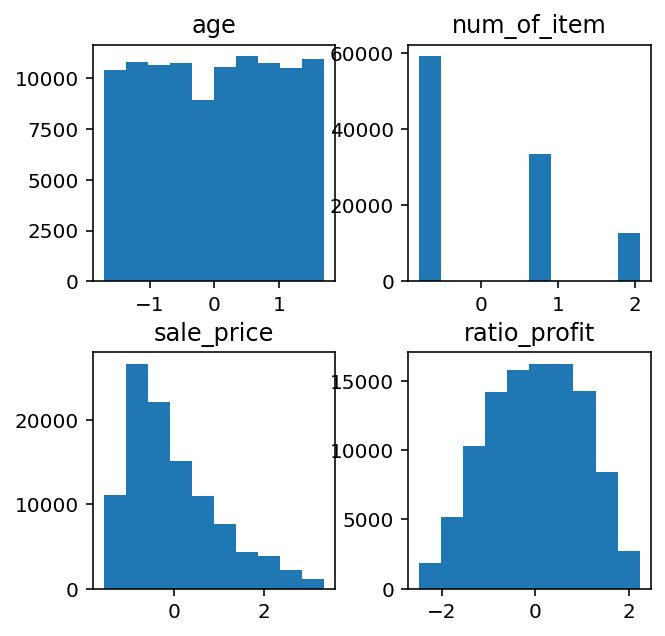

In [ ]:
X_scaled.hist(grid=False)

## Penentuan Jumlah K yang Optimal

Clustering with n_clusters=1
Done clustering in 0.942s
Clustering with n_clusters=2
Done clustering in 1.463s
Clustering with n_clusters=3
Done clustering in 1.863s
Clustering with n_clusters=4
Done clustering in 2.264s
Clustering with n_clusters=5
Done clustering in 2.362s
Clustering with n_clusters=6
Done clustering in 2.801s
Clustering with n_clusters=7
Done clustering in 2.819s
Clustering with n_clusters=8
Done clustering in 2.857s
Clustering with n_clusters=9
Done clustering in 3.855s


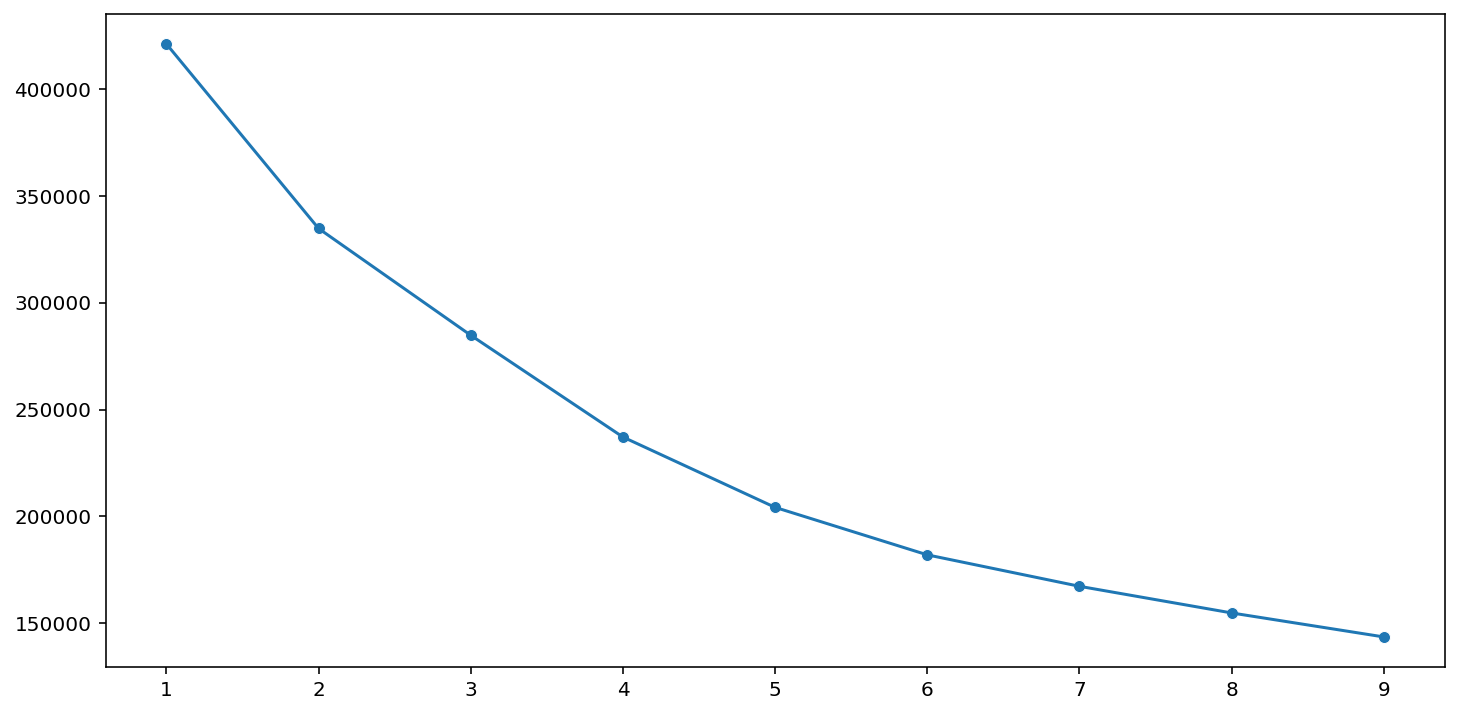

In [ ]:
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=3)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(dfj_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

# Membuat visualisasi dari elbow methode
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 10), y=ssd)
sns.scatterplot(x=range(1, 10), y=ssd)
plt.xticks(range(1, 10))
plt.show()

Clustering with n_clusters=2
Done clustering in 1.238s
Calculating silhouette coefficient..
Done calculating in 125.933s
Clustering with n_clusters=3
Done clustering in 2.017s
Calculating silhouette coefficient..
Done calculating in 126.173s
Clustering with n_clusters=4
Done clustering in 2.323s
Calculating silhouette coefficient..
Done calculating in 123.457s
Clustering with n_clusters=5
Done clustering in 2.588s
Calculating silhouette coefficient..
Done calculating in 125.285s


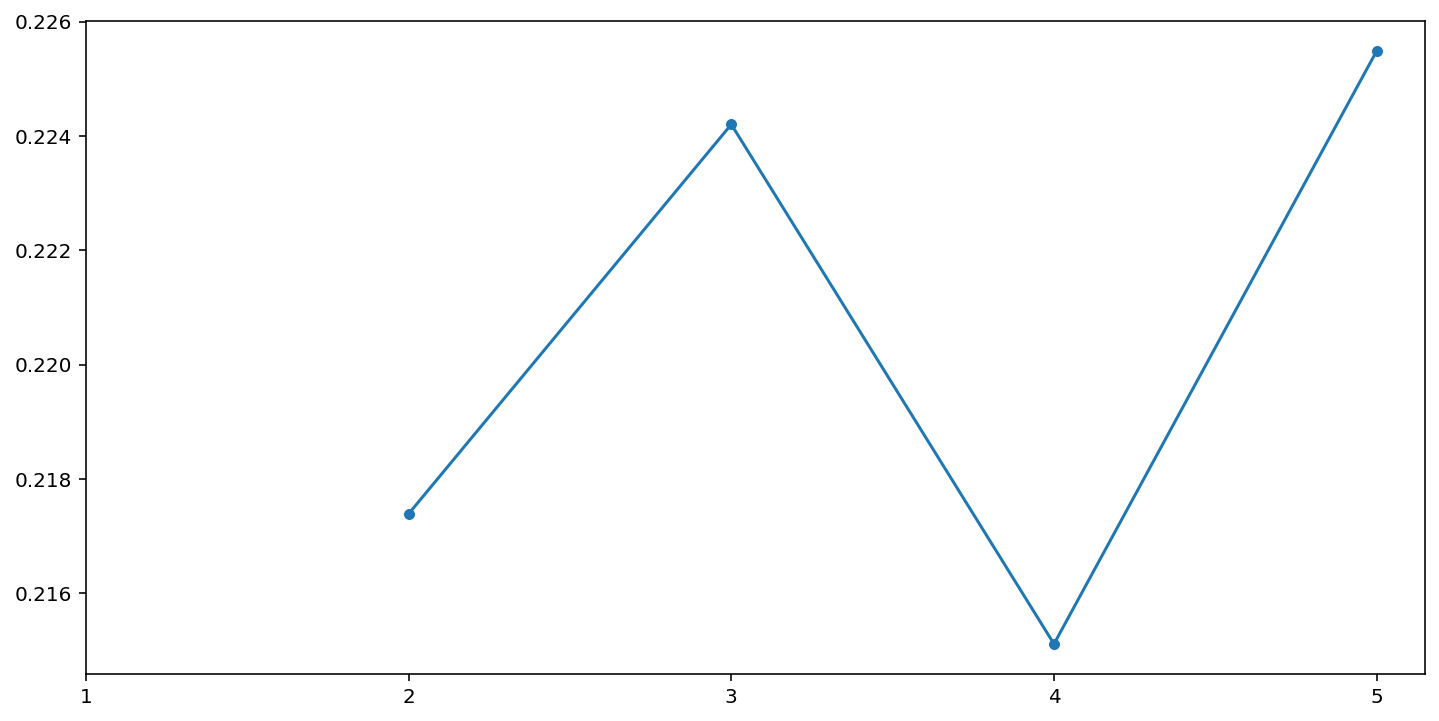

In [ ]:
# Code for the whole dataset
silhouette_scores = []

# may take a longer time to run
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=8)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")
  
# Membuat visualisasinya
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 6), y=silhouette_scores)
sns.scatterplot(x=range(2, 6), y=silhouette_scores)
plt.xticks(range(1, 6))
plt.show()

##Modelling Menggunakan KMeans

In [ ]:
# Algoritma K-Means Clustering (K = 3)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X_scaled)
y_predicted

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
df_terjual['Cluster']=y_predicted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
grouped_km = df_terjual[['Cluster','age','num_of_item','sale_price','ratio_profit']].groupby(['Cluster']).mean()
grouped_km

,age,num_of_item,sale_price,ratio_profit
Cluster,,,,
0,41.153436,2.304099,33.591760,0.504313
1,40.870176,1.000000,31.336675,0.503565
2,41.449795,1.438286,87.914627,0.527536


In [ ]:
df_terjual[['age','num_of_item','sale_price','ratio_profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,105305.0,41.087308,16.993890,12.00,26.000,41.000000,56.000,70.000000
num_of_item,105305.0,1.559878,0.698667,1.00,1.000,1.000000,2.000,3.000000
sale_price,105305.0,43.311941,27.791337,0.02,22.500,36.279999,59.000,136.270004
ratio_profit,105305.0,0.508563,0.071706,0.33,0.453,0.510000,0.566,0.669000


In [ ]:
df_terjual.to_csv('clustering_3_terjual', index=False)

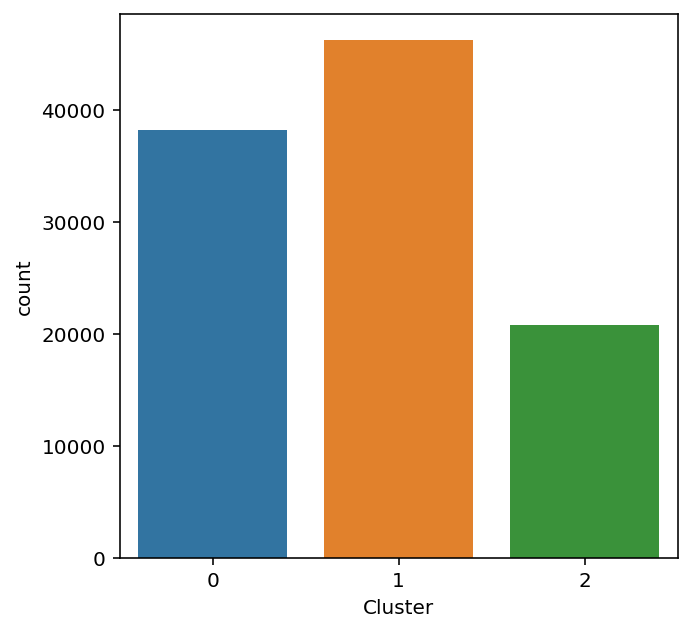

In [ ]:
sns.countplot(x='Cluster', data=df_terjual)
plt.xticks()
plt.show()

## **Visualisasi Berdasarkan Negara**

###Visualisasi jumlah negara permasing-masing cluster 0

In [ ]:
# Melakukan filtering dengan memanggil baris dan kolom yang cluster 0
df_terjual.Cluster.unique()

array([0, 1, 2], dtype=int32)

In [ ]:
df_terjual_cluster_nol = [0]
cluster_nol = df_terjual[df_terjual.Cluster.isin(df_terjual_cluster_nol)]

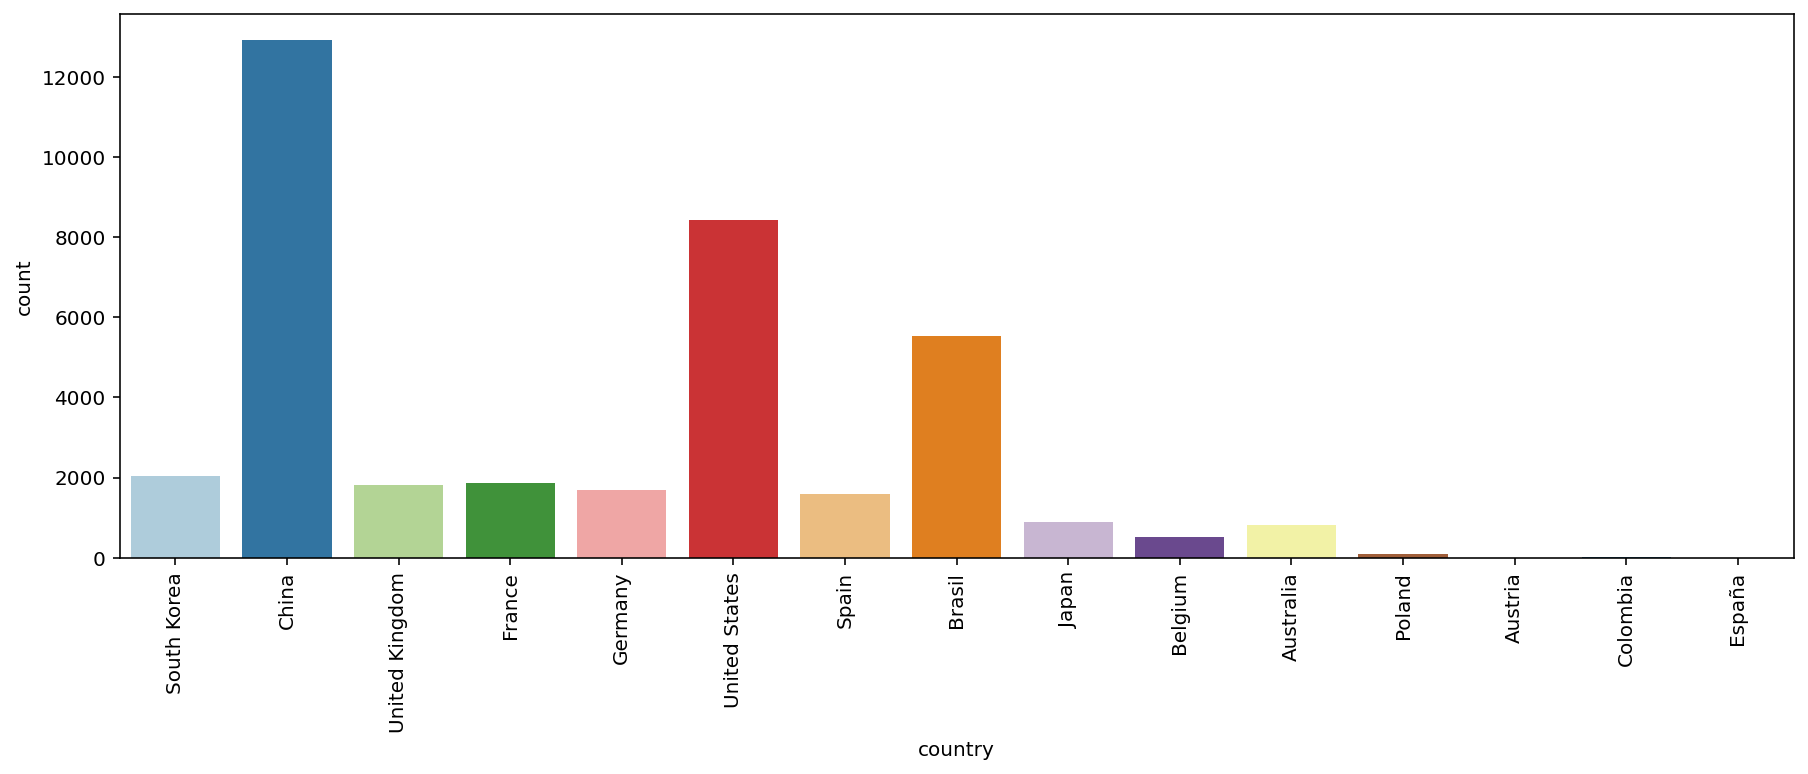

In [ ]:
# Visualisasi Jumlah Barang yang Terjual dalam Tiap Kategori Produk di Cluster 0

plt.figure(figsize=(15,5))
sns.countplot(x='country', data=cluster_nol, palette = 'Paired')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

###Visualisasi jumlah negara permasing-masing cluster 1

In [ ]:
# Melakukan filtering dengan memanggil baris dan kolom yang cluster 1
df_terjual.Cluster.unique()

array([0, 1, 2], dtype=int32)

In [ ]:
df_terjual_cluster_satu = [1]
cluster_satu = df_terjual[df_terjual.Cluster.isin(df_terjual_cluster_satu)]

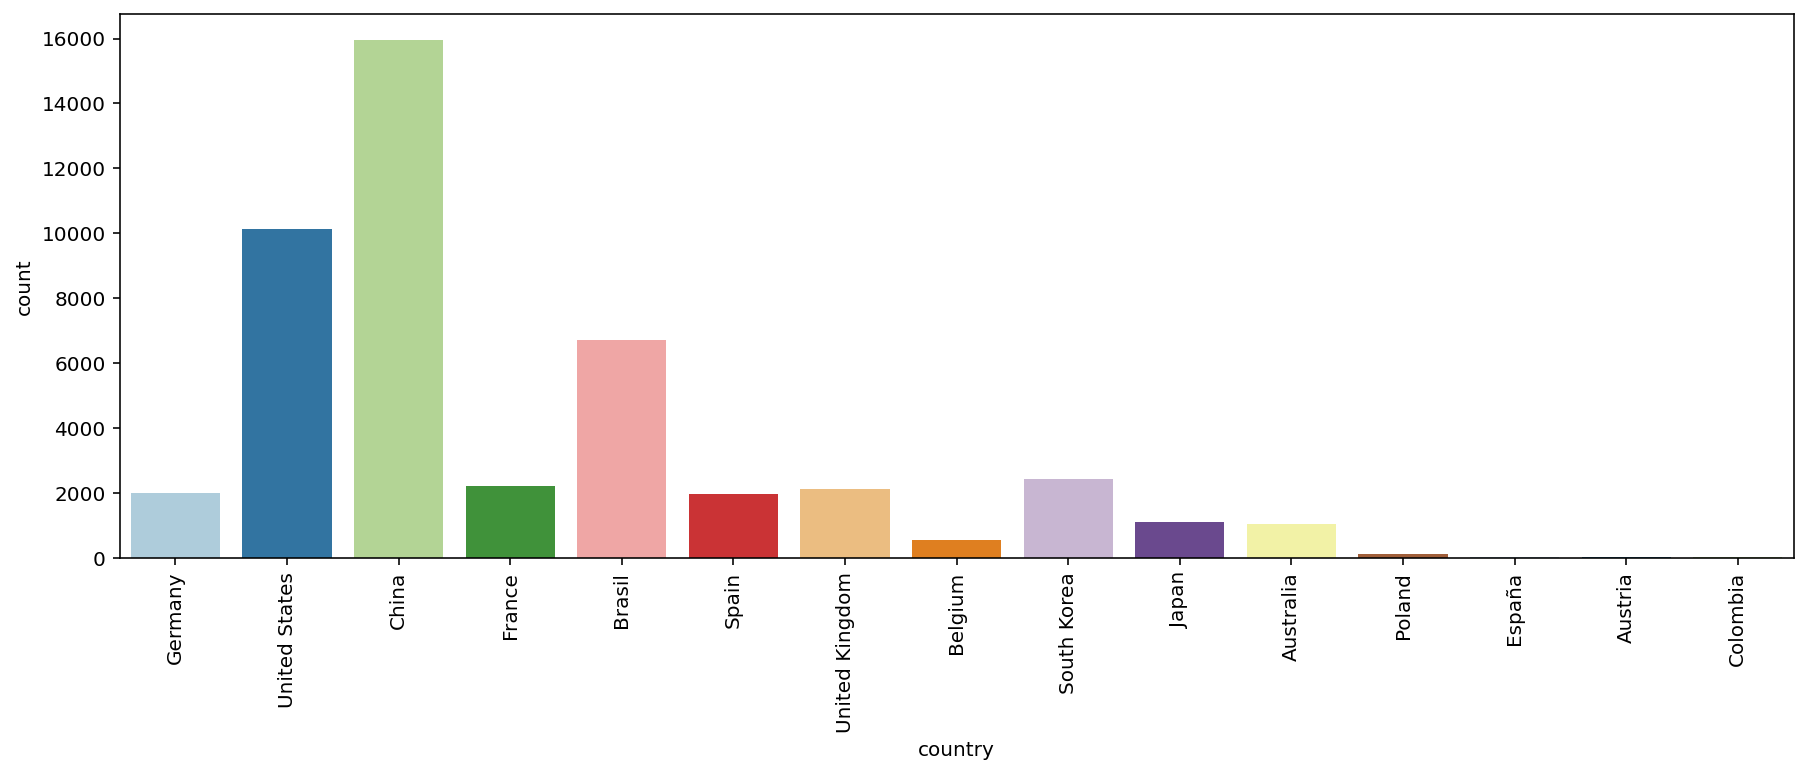

In [ ]:
# Visualisasi Jumlah Barang yang Terjual dalam Tiap Kategori Produk di Cluster 1

plt.figure(figsize=(15,5))
sns.countplot(x='country', data=cluster_satu, palette = 'Paired')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

###Visualisasi jumlah negara permasing-masing cluster 2

In [ ]:
# Melakukan filtering dengan memanggil baris dan kolom yang cluster 1
df_terjual.Cluster.unique()

array([0, 1, 2], dtype=int32)

In [ ]:
df_terjual_cluster_dua = [2]
cluster_dua = df_terjual[df_terjual.Cluster.isin(df_terjual_cluster_dua)]

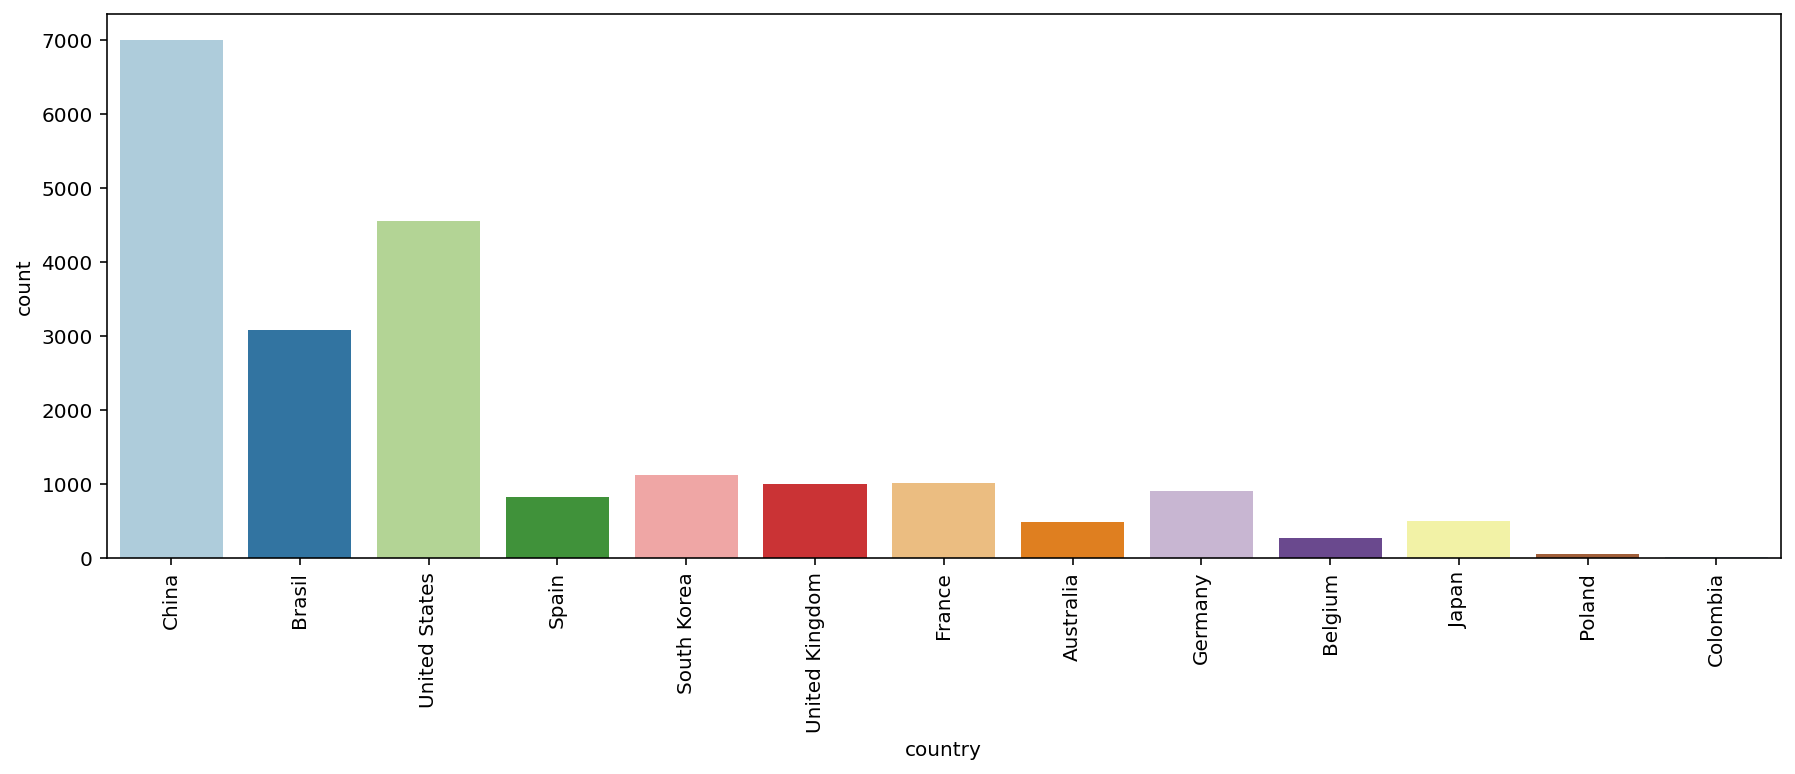

In [ ]:
# Visualisasi Jumlah Barang yang Terjual dalam Tiap Kategori Produk di Cluster 1

plt.figure(figsize=(15,5))
sns.countplot(x='country', data=cluster_dua, palette = 'Paired')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

## **Visualisasi Berdasarkan Kategori**

###Visualisasi jumlah negara permasing-masing cluster 0

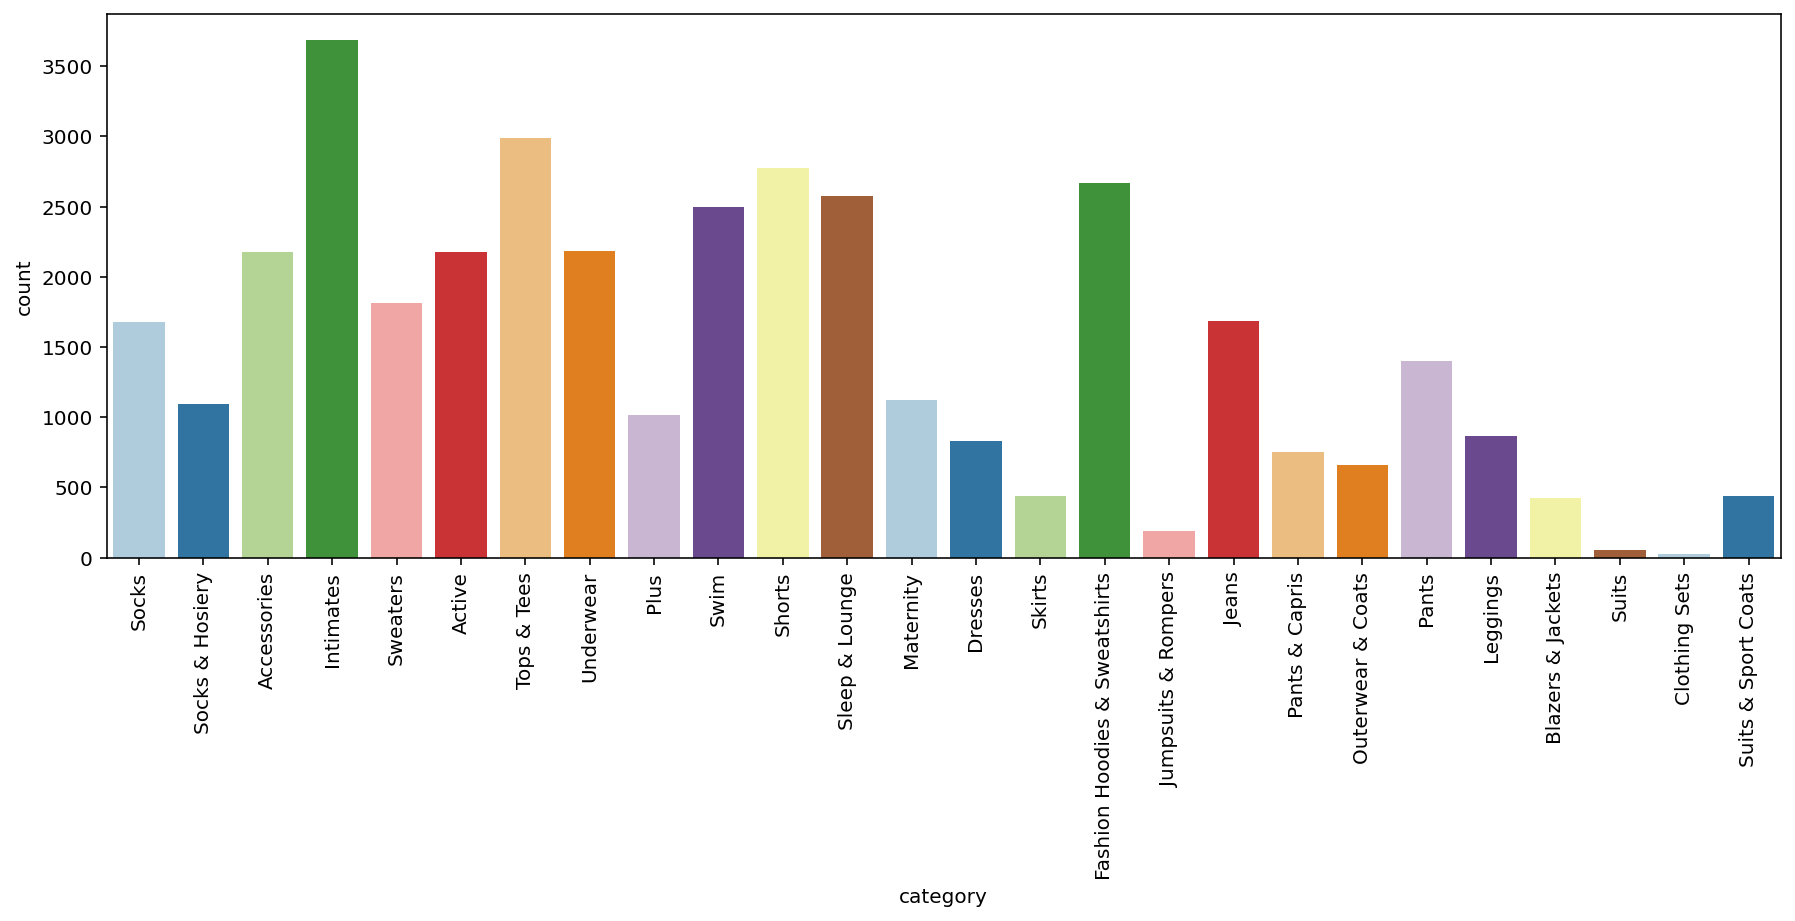

In [ ]:
# Visualisasi Jumlah Barang yang Terjual dalam Tiap Kategori Produk di Cluster 0

plt.figure(figsize=(15,5))
sns.countplot(x='category', data=cluster_nol, palette = 'Paired')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

###Visualisasi jumlah negara permasing-masing cluster 1

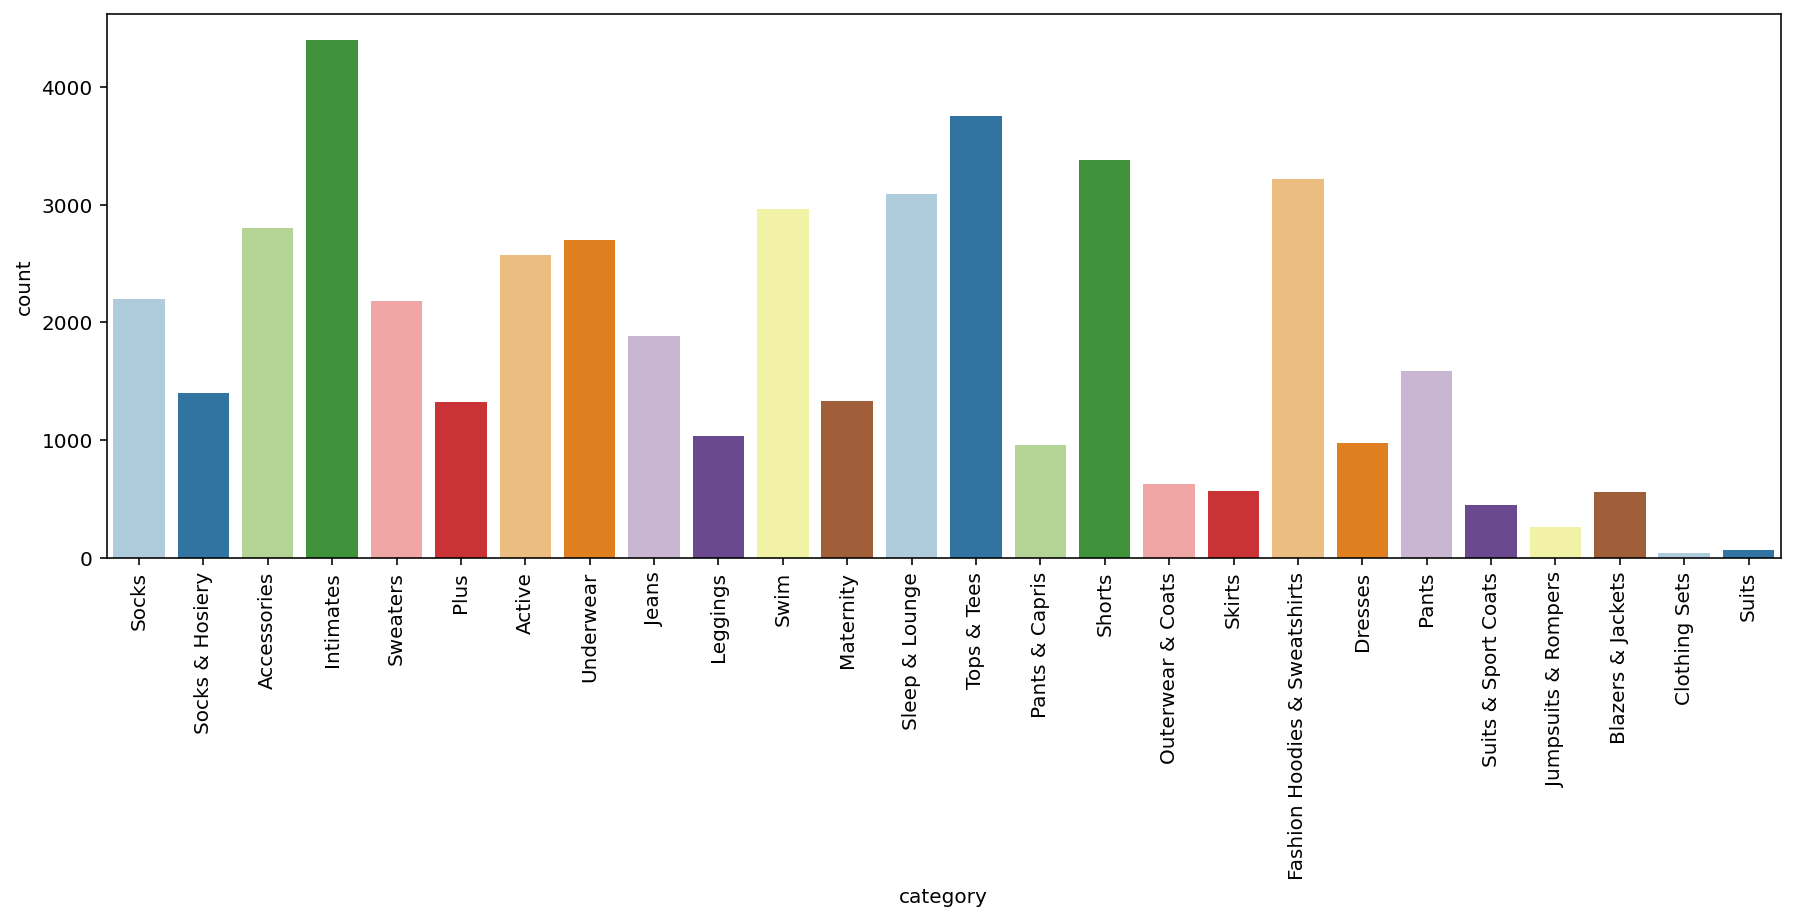

In [ ]:
# Visualisasi Jumlah Barang yang Terjual dalam Tiap Kategori Produk di Cluster 1

plt.figure(figsize=(15,5))
sns.countplot(x='category', data=cluster_satu, palette = 'Paired')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

###Visualisasi jumlah negara permasing-masing cluster 2

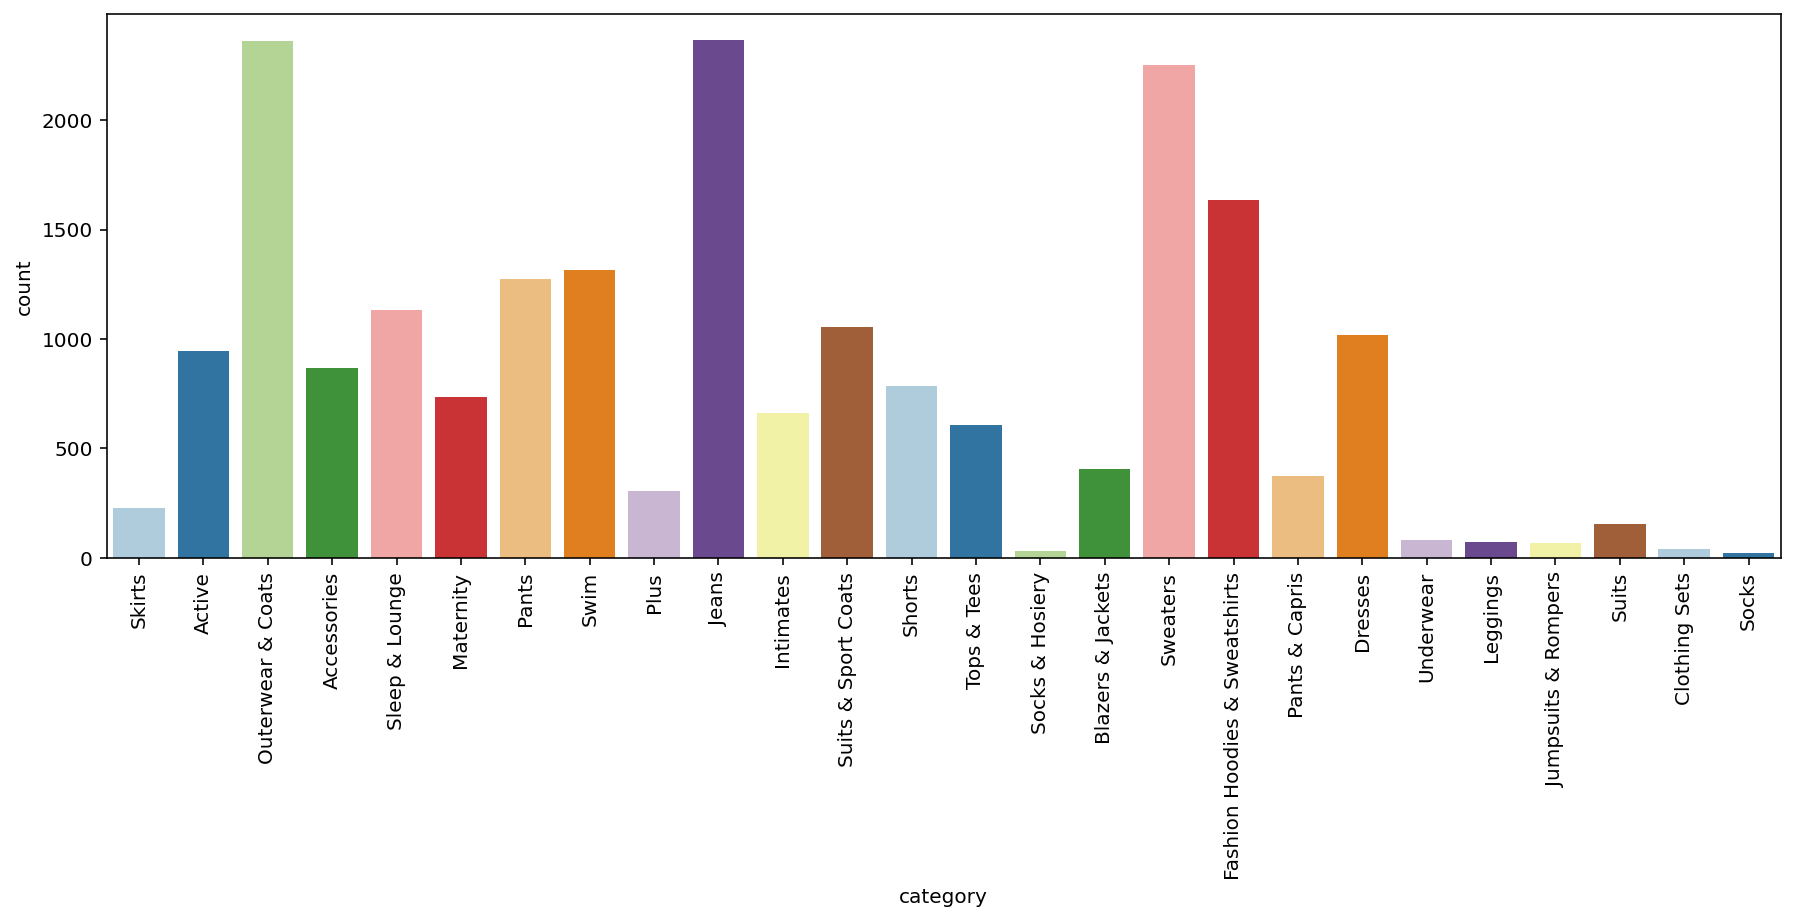

In [ ]:
# Visualisasi Jumlah Barang yang Terjual dalam Tiap Kategori Produk di Cluster 1

plt.figure(figsize=(15,5))
sns.countplot(x='category', data=cluster_dua, palette = 'Paired')
plt.xticks(rotation=90)
plt.xticks()
plt.show()